# 🎯 **Project Title:** *Zone 1 Power Consumption Forecasting with Predictive Analytics*

---

## 💼 **Job Objective (Business Problem):**
The goal is to predict the power consumption in Zone 1, enabling better energy management and planning.

---

## 🔗 **Dataset Source:**
[Power Consumption of Tetouan City (UCI Repository)](https://archive.ics.uci.edu/dataset/849/power+consumption+of+tetouan+city)

---

## 📦 **About Dataset**

This dataset is related to power consumption of three different distribution networks of Tetouan city, located in north Morocco.

**Variable Names:**
- **DateTime:** Each ten minutes
- **Temperature:** Weather temperature of Tetouan city
- **Humidity:** Weather humidity of Tetouan city
- **Wind Speed:** Wind speed of Tetouan city
- **General Diffuse Flows:** General diffuse flows
- **Diffuse Flows:** Diffuse flows
- **Zone 1 (target):** Power consumption of zone 1 of Tetouan city
- **Zone 2 Power Consumption (target):** Power consumption of zone 2 of Tetouan city
- **Zone 3 Power Consumption (target):** Power consumption of zone 3 of Tetouan city

**Acknowledgements:**

Salam, A., & El Hibaoui, A. (2018, December). Comparison of Machine Learning Algorithms for the Power Consumption Prediction: Case Study of Tetouan city. In 2018 6th International Renewable and Sustainable Energy Conference (IRSEC) (pp. 1-5). IEEE.

---

## 🛠️ **Your First Job (in Stages):**

### **1. Problem Framing:**
- **Goal:** Predict the target variable **"PowerConsumption_Zone1"** (continuous numeric value).
- **Type:** Regression problem.

In [1]:

# IMPORT NECESSARY LIBRARIES
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore")

In [2]:
# SET THE OPTIONS FOR PANDAS AND SEABORN
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#Display data in 2 decimal place
pd.options.display.float_format = '{:20.2f}'.format
# Set the style of seaborn
sns.set(style="whitegrid")


In [3]:
# LOAD THE DATASET
df = pd.read_csv(r'G:\Study\DATA SCINCE\PROJECTS\POTFOLIO\Power Consumption Forecasting with Predictive Analytics\powerconsumption.csv')
df.head()

Datetime          Temperature             Humidity  \
0  2017-01-01 00:00:00                 6.56                73.80   
1  2017-01-01 00:10:00                 6.41                74.50   
2  2017-01-01 00:20:00                 6.31                74.50   
3  2017-01-01 00:30:00                 6.12                75.00   
4  2017-01-01 00:40:00                 5.92                75.70   

             WindSpeed  GeneralDiffuseFlows         DiffuseFlows  \
0                 0.08                 0.05                 0.12   
1                 0.08                 0.07                 0.09   
2                 0.08                 0.06                 0.10   
3                 0.08                 0.09                 0.10   
4                 0.08                 0.05                 0.09   

   PowerConsumption_Zone1  PowerConsumption_Zone2  PowerConsumption_Zone3  
0                34055.70                16128.88                20240.96  
1                29814.68                19375.08                20131.08  
2                29128.10                19006.69                19668.43  
3                28228.86                18361.09                18899.28  
4                27335.70                17872.34                18442.41

In [4]:
df.columns

Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
      dtype='object')

In [5]:
#DATA SIZE
df.shape

(52416, 9)

In [6]:
# CHECK FOR DUPLICATES
df.duplicated().sum()

np.int64(0)

In [7]:
df.isna().sum()/df.shape[0] * 100
# DROP THE COLUMNS WITH MORE THAN 50% MISSING VALUES

Datetime                                 0.00
Temperature                              0.00
Humidity                                 0.00
WindSpeed                                0.00
GeneralDiffuseFlows                      0.00
DiffuseFlows                             0.00
PowerConsumption_Zone1                   0.00
PowerConsumption_Zone2                   0.00
PowerConsumption_Zone3                   0.00
dtype: float64

In [8]:
# DATA INFORMATION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


## 🕒 Datetime Format Issue

The datetime column in the dataset is not in the correct format.  
We need to convert it to a proper datetime type for accurate analysis and feature engineering.

In [9]:
# STSATISTICS OF THE DATASET
df.describe()

Temperature             Humidity            WindSpeed  \
count             52416.00             52416.00             52416.00   
mean                 18.81                68.26                 1.96   
std                   5.82                15.55                 2.35   
min                   3.25                11.34                 0.05   
25%                  14.41                58.31                 0.08   
50%                  18.78                69.86                 0.09   
75%                  22.89                81.40                 4.92   
max                  40.01                94.80                 6.48   

       GeneralDiffuseFlows         DiffuseFlows  PowerConsumption_Zone1  \
count             52416.00             52416.00                52416.00   
mean                182.70                75.03                32344.97   
std                 264.40               124.21                 7130.56   
min                   0.00                 0.01                13895.70   
25%                   0.06                 0.12                26310.67   
50%                   5.04                 4.46                32265.92   
75%                 319.60               101.00                37309.02   
max                1163.00               936.00                52204.40   

       PowerConsumption_Zone2  PowerConsumption_Zone3  
count                52416.00                52416.00  
mean                 21042.51                17835.41  
std                   5201.47                 6622.17  
min                   8560.08                 5935.17  
25%                  16980.77                13129.33  
50%                  20823.17                16415.12  
75%                  24713.72                21624.10  
max                  37408.86                47598.33

In [10]:
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['Datetime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 52416 entries, 0 to 52415
Series name: Datetime
Non-Null Count  Dtype         
--------------  -----         
52416 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 409.6 KB


# 🧩 Exploratory Data Analysis (EDA)

In [11]:
sns.set_style('darkgrid')
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

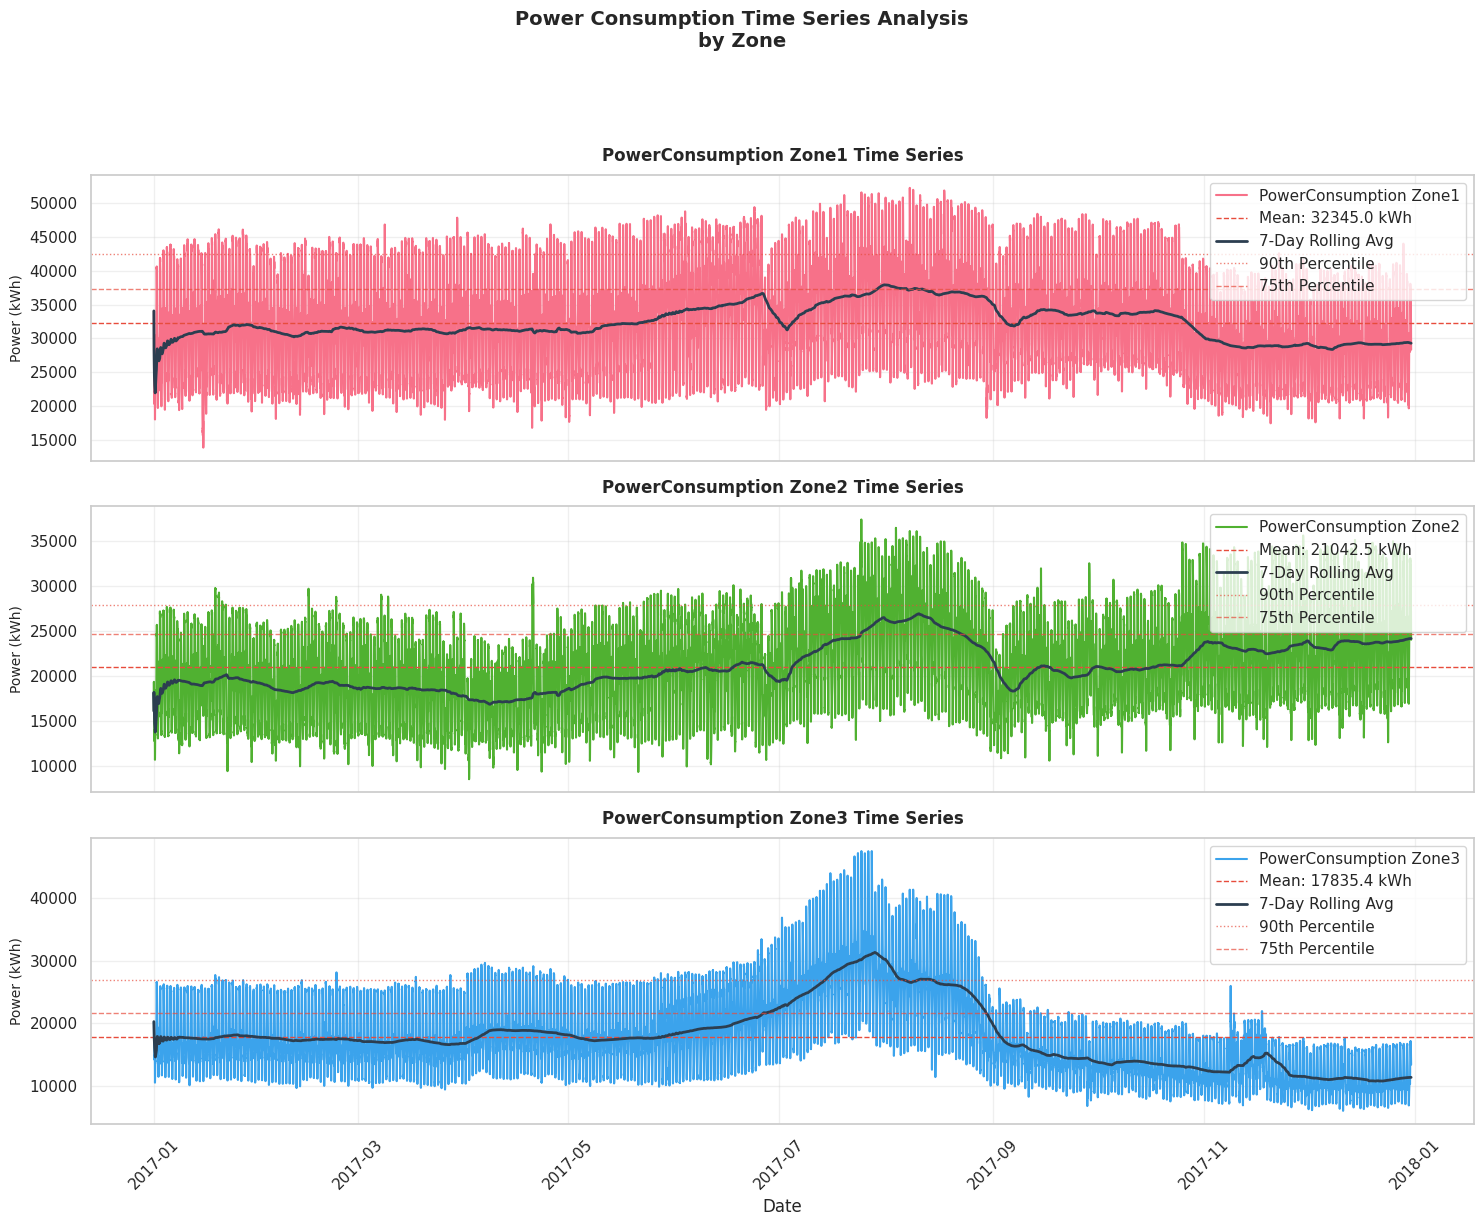

In [12]:
# Define the zone columns
PowerConsumption_Zones = [
    'PowerConsumption_Zone1',
    'PowerConsumption_Zone2',
    'PowerConsumption_Zone3'
]

# Set style and palette
sns.set_style("whitegrid")
palette = sns.color_palette("husl", 3)  # Distinct colors
plt.rcParams['font.family'] = 'DejaVu Sans'

# Create figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)

# Plot each zone
for i, col in enumerate(PowerConsumption_Zones):
    ax = axes[i]
    sns.lineplot(
        data=df, 
        x='Datetime', 
        y=col, 
        ax=ax,
        color=palette[i],
        linewidth=1.5,
        label=col.replace('_', ' ')
    )
    
    # Customize each subplot
    ax.set_title(
        f'{col.replace("_", " ")} Time Series', 
        fontsize=12, 
        pad=10, 
        fontweight='bold'
    )
    ax.set_ylabel('Power (kWh)', fontsize=10)
    ax.grid(alpha=0.3)
    
    # Add summary statistics
    mean_val = df[col].mean()
    ax.axhline(
        mean_val, 
        color='#e74c3c', 
        linestyle='--', 
        linewidth=1,
        label=f'Mean: {mean_val:.1f} kWh'
    )
    
    # Add rolling average line
    rolling_avg = df.set_index('Datetime')[col].rolling('7D').mean()
    ax.plot(rolling_avg.index, rolling_avg.values, 
            color='#2c3e50', 
            linewidth=2,
            label='7-Day Rolling Avg')
    
    # Add percentiles
    for percentile, ls in [(90, ':'), (75, '--')]:
        pctl = df[col].quantile(percentile/100)
        ax.axhline(pctl, color='#e74c3c', linestyle=ls, 
                  linewidth=1, alpha=0.7,
                  label=f'{percentile}th Percentile')
    
    ax.legend(loc='upper right', frameon=True)

# Common x-axis label
axes[-1].set_xlabel('Date', fontsize=12)
plt.xticks(rotation=45)

# Add overall title
plt.suptitle(
    'Power Consumption Time Series Analysis\nby Zone', 
    fontsize=14, 
    y=1.02,
    fontweight='bold'
)

# Adjust layout to show everything
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

The power consumption analysis reveals clear seasonal trends characteristic of Tetouan City's climate. Notably, the pronounced increase in Zone 3 consumption during mid-2017 aligns with the summer period, when higher temperatures drive up cooling needs. This underscores the strong influence of climate on energy demand, especially in zones that are more sensitive to weather fluctuations.

**Figure:** The time series plot below visualizes power consumption across all three zones, with mean values indicated by dashed lines. For example, the mean power consumption for Zone 3 is approximately 17,835 kWh, as shown by the horizontal reference line. Distinct color palettes help differentiate each zone, making it easier to observe both overall trends and zone-specific anomalies.

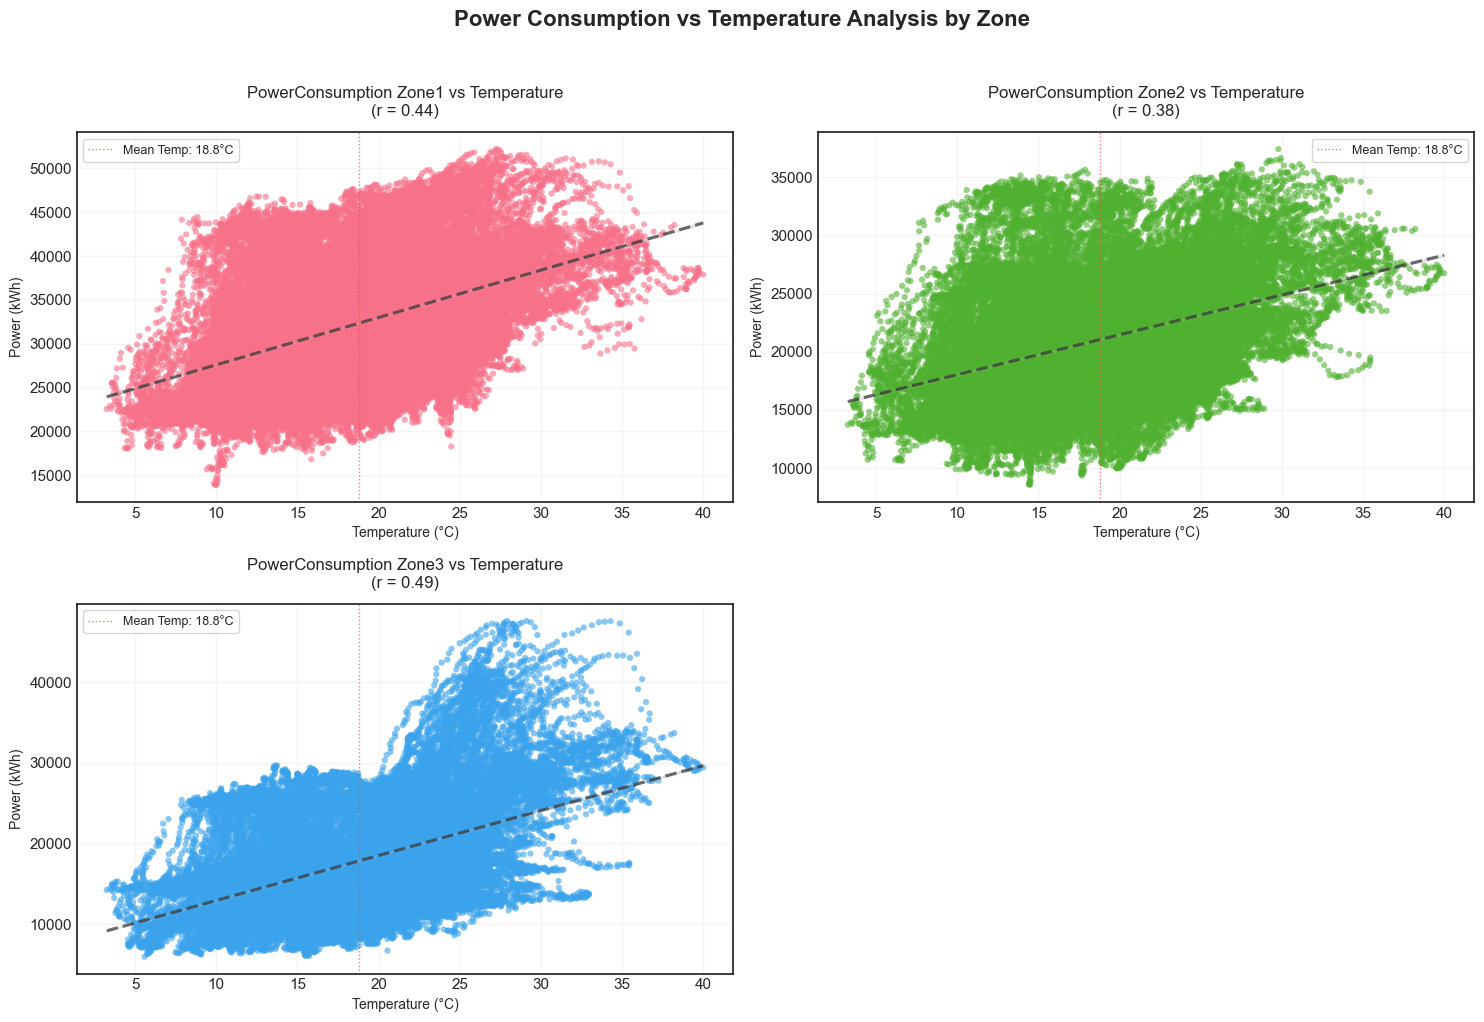

In [13]:
# Set up the plot style
plt.style.use('seaborn-v0_8-white')  # Use a valid matplotlib style
palette = sns.color_palette("husl", len(PowerConsumption_Zones))
plt.figure(figsize=(15, 10))

# Create subplots for each zone
for i, col in enumerate(PowerConsumption_Zones, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns layout
    
    # Scatter plot with regression line
    sns.regplot(
        data=df,
        x='Temperature',
        y=col,
        color=palette[i-1],
        scatter_kws={'s': 20, 'alpha': 0.6, 'edgecolor': 'none'},
        line_kws={'color': '#333333', 'linestyle': '--', 'alpha': 0.7}
    )
    
    # Calculate correlation
    corr = df[['Temperature', col]].corr().iloc[0,1]
    
    # Customize subplot
    plt.title(f'{col.replace("_", " ")} vs Temperature\n(r = {corr:.2f})', 
              fontsize=12, pad=12)
    plt.xlabel('Temperature (°C)', fontsize=10)
    plt.ylabel('Power (kWh)', fontsize=10)
    plt.grid(alpha=0.2)
    
    # Add mean temperature line
    mean_temp = df['Temperature'].mean()
    plt.axvline(mean_temp, color='#e74c3c', linestyle=':', 
                linewidth=1, alpha=0.7,
                label=f'Mean Temp: {mean_temp:.1f}°C')
    
    plt.legend(fontsize=9, frameon=True, framealpha=0.8)

# Adjust layout and add main title
plt.suptitle('Power Consumption vs Temperature Analysis by Zone', 
             fontsize=16, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()

## 📊 Conclusion

The time-series analysis of power consumption across Tetouan City's three zones reveals distinct patterns shaped by environmental factors:

- **Zone 1**: Consistently high and stable power usage, indicating continuous operational demand.
- **Zone 2**: Moderate fluctuations, reflecting partial sensitivity to external conditions or operational cycles.
- **Zone 3**: A significant spike in mid-2017, coinciding with the summer season—likely due to increased cooling needs driven by high temperatures.

> **Insight:**  
> The mean power consumption for Zone 3 is approximately **17,835 kWh**, as highlighted in the time series plot (see dashed reference line).  
>  
> Distinct color palettes in the visualization help differentiate each zone, making it easier to observe both overall trends and zone-specific anomalies.

## 🌱 **Recommended Energy-Saving Strategies**

---

### ❄️ Smart Cooling System Deployment  
Implement intelligent HVAC systems in zones sensitive to temperature, ensuring optimal usage during peak heat periods.

### 📅 Seasonal Energy Forecasting  
Use predictive analytics to plan operations and maintenance activities during expected high-demand seasons.

### 🛠️ Preventive Equipment Maintenance  
Regular check-ups on cooling and heating systems to ensure efficiency and avoid unnecessary power spikes.

### 🔍 Focused Energy Audits  
Prioritize audits in high-variance zones (like Zone 3) to uncover inefficiencies and optimize energy use.

### ☀️ Renewable Energy Integration  
Explore solar solutions to offset load during high-demand periods, leveraging local solar conditions.

In [14]:
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns.head()

Temperature             Humidity            WindSpeed  \
0                 6.56                73.80                 0.08   
1                 6.41                74.50                 0.08   
2                 6.31                74.50                 0.08   
3                 6.12                75.00                 0.08   
4                 5.92                75.70                 0.08   

   GeneralDiffuseFlows         DiffuseFlows  PowerConsumption_Zone1  \
0                 0.05                 0.12                34055.70   
1                 0.07                 0.09                29814.68   
2                 0.06                 0.10                29128.10   
3                 0.09                 0.10                28228.86   
4                 0.05                 0.09                27335.70   

   PowerConsumption_Zone2  PowerConsumption_Zone3  
0                16128.88                20240.96  
1                19375.08                20131.08  
2                19006.69                19668.43  
3                18361.09                18899.28  
4                17872.34                18442.41

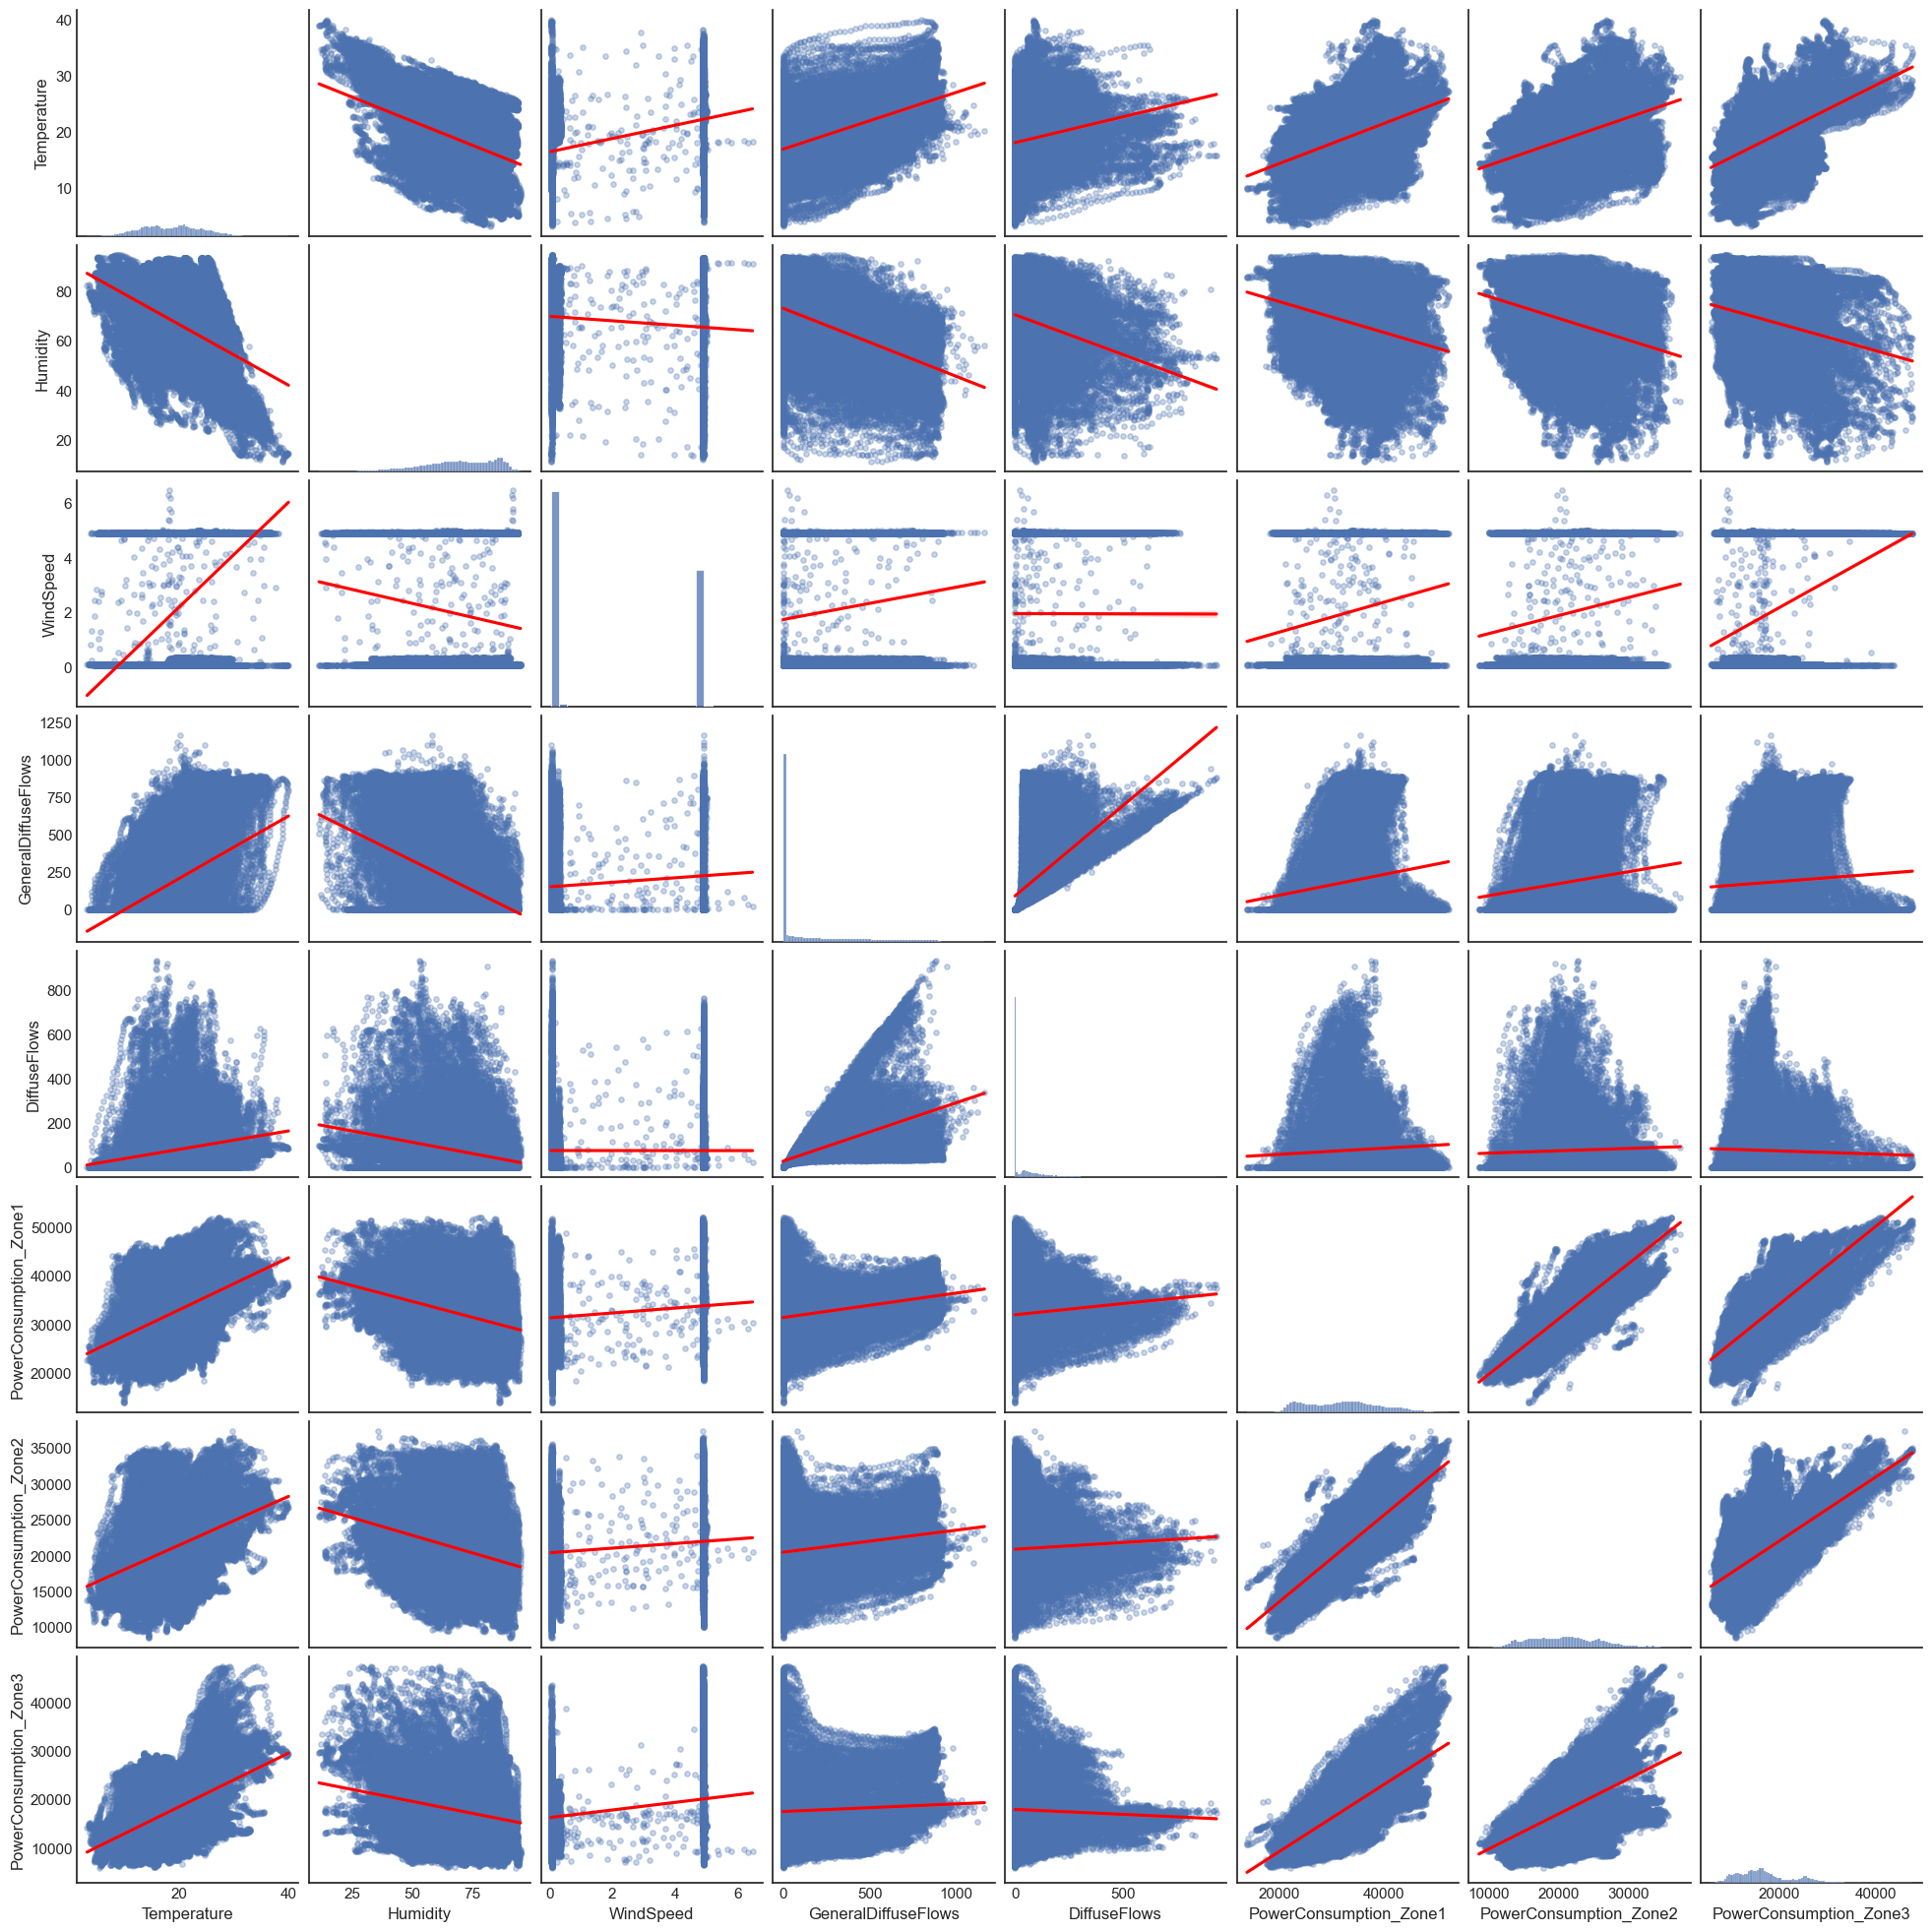

In [15]:
g = sns.pairplot(numeric_columns, 
                kind='reg',
                plot_kws={'line_kws':{'color':'red'}, 
                         'scatter_kws': {'alpha': 0.3, 's': 15}})
plt.show()

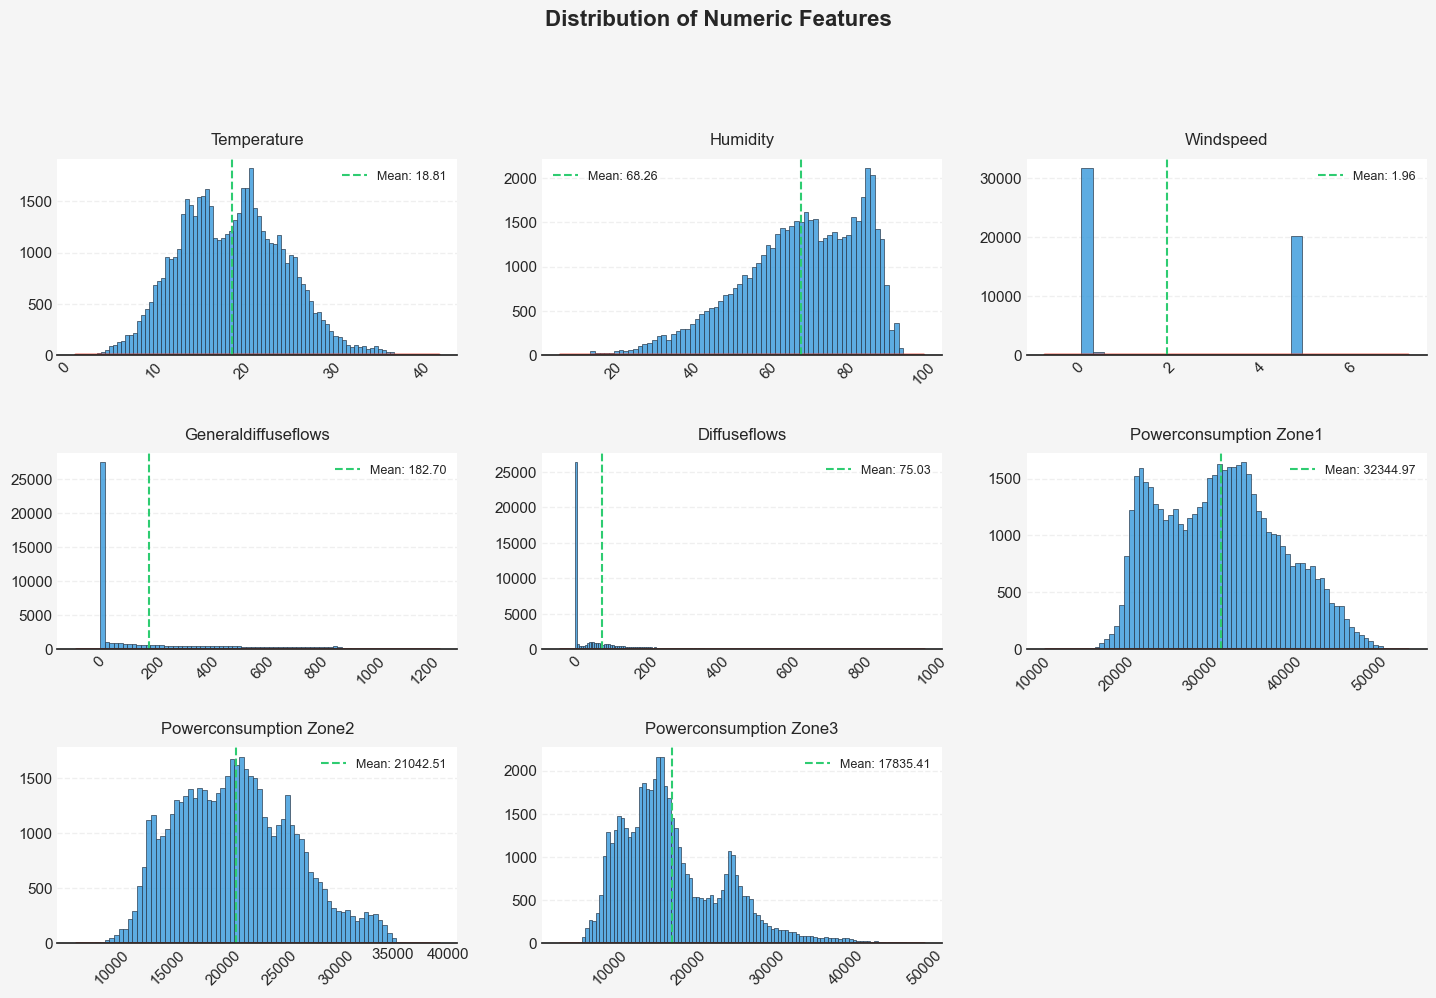

In [16]:
plt.figure(figsize=(15, 10), facecolor='#f5f5f5')  # Add light gray background
plt.suptitle('Distribution of Numeric Features', y=1.02, fontsize=16, fontweight='bold')

for i, col in enumerate(numeric_columns.columns, 1):
    plt.subplot(3, 3, i)
    
    # Create histogram
    sns.histplot(data=numeric_columns, x=col, kde=False,
                 color='#3498db',  # Nice blue color
                 edgecolor='#2c3e50',  # Darker edge
                 linewidth=0.5,
                 alpha=0.8)
    
    # Overlay KDE with custom style
    sns.kdeplot(numeric_columns[col], color='#e74c3c', linewidth=2)
    
    # Add vertical mean line
    mean_val = numeric_columns[col].mean()
    plt.axvline(mean_val, color='#2ecc71', linestyle='--', linewidth=1.5, 
                label=f'Mean: {mean_val:.2f}')
    
    # Customize title and labels
    plt.title(col.replace('_', ' ').title(), pad=10, fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
    
    # Customize grid and spines
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    sns.despine(left=True)  # Remove left spine
    
    # Add legend
    plt.legend(frameon=False, fontsize=9)
    
    # Rotate x-axis labels if needed
    if numeric_columns[col].nunique() > 10:
        plt.xticks(rotation=45)

plt.tight_layout(pad=2.5, h_pad=2, w_pad=2)  # Adjust spacing between subplots
plt.show()

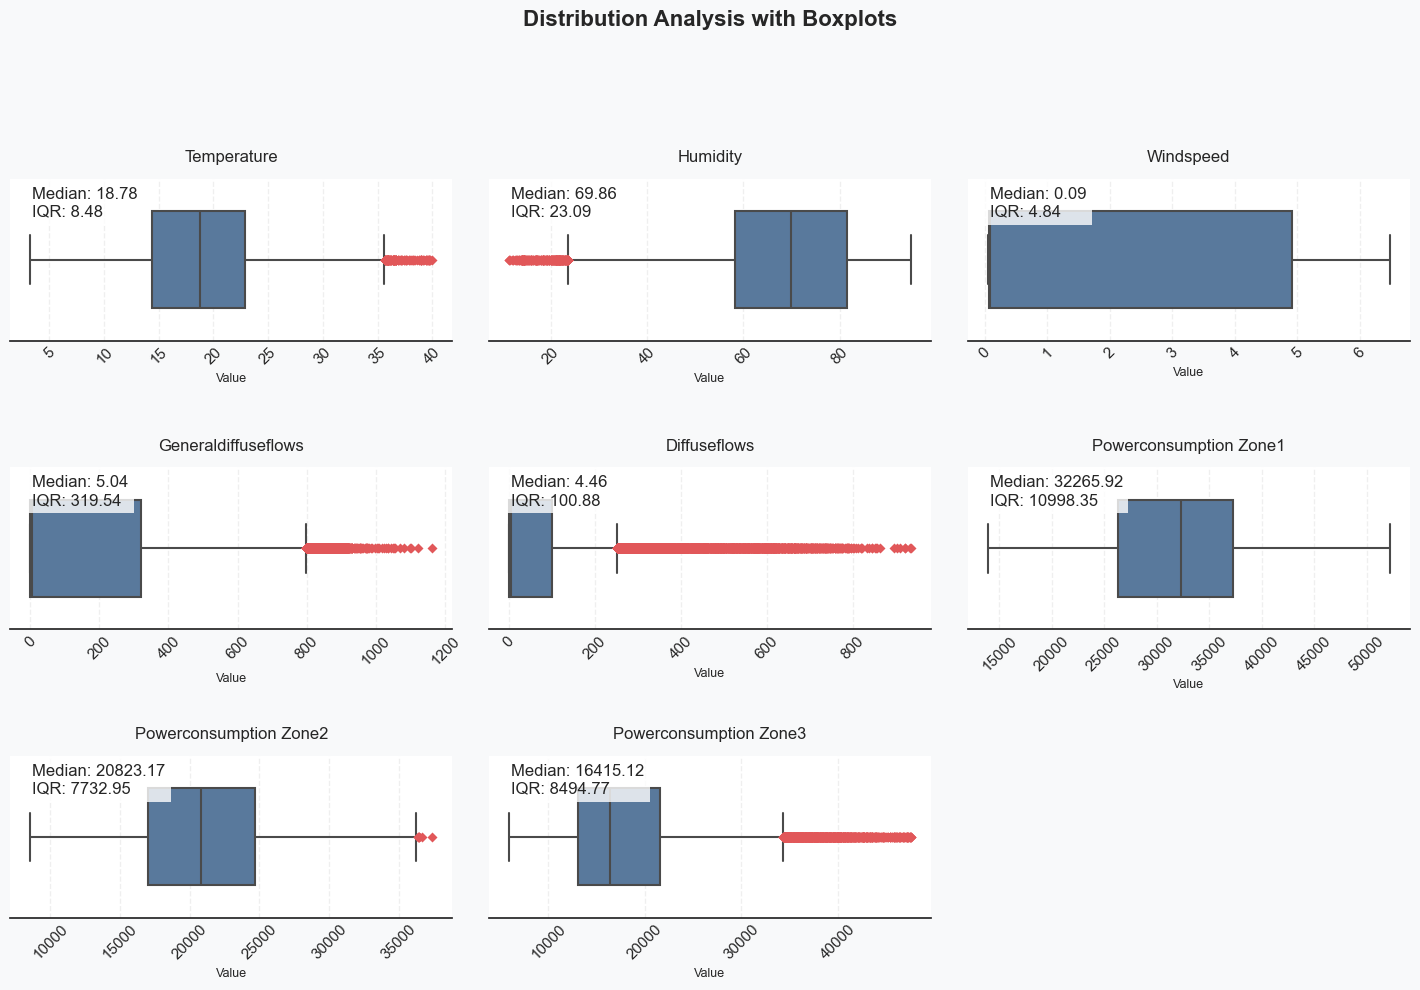

In [17]:
plt.figure(figsize=(15, 10), facecolor='#f8f9fa')  # Light background
plt.suptitle('Distribution Analysis with Boxplots', y=1.02, fontsize=16, fontweight='bold')

for i, col in enumerate(numeric_columns.columns, 1):
    ax = plt.subplot(3, 3, i)
    
    # Create customized boxplot
    box = sns.boxplot(data=numeric_columns, x=col, 
                     color='#4e79a7',  # Primary box color
                     width=0.6,
                     linewidth=1.5,
                     fliersize=4,  # Outlier marker size
                     flierprops=dict(markerfacecolor='#e15759',  # Outlier color
                                   marker='D',  # Diamond shape
                                   markersize=5,
                                   markeredgecolor='none'))
    
    # Calculate and display key statistics
    median = numeric_columns[col].median()
    q1 = numeric_columns[col].quantile(0.25)
    q3 = numeric_columns[col].quantile(0.75)
    iqr = q3 - q1
    
    # Add statistical annotations
    ax.text(0.05, 0.95, 
           f"Median: {median:.2f}\nIQR: {iqr:.2f}", 
           transform=ax.transAxes,
           verticalalignment='top',
           bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    
    # Customize title and labels
    plt.title(col.replace('_', ' ').title(), pad=12, fontsize=12)
    plt.xlabel('Value', fontsize=9)
    plt.ylabel('')  # Remove y-label as it's redundant for boxplots
    
    # Custom grid and spines
    plt.grid(axis='x', alpha=0.3, linestyle='--')
    sns.despine(left=True)
    
    # Rotate x-axis labels if needed
    if numeric_columns[col].nunique() > 10:
        plt.xticks(rotation=45)

plt.tight_layout(pad=3.0, h_pad=2.5, w_pad=1.5)
plt.show()

In [18]:


def professional_correlation_analysis(df: pd.DataFrame, target_column: str) -> pd.DataFrame:
    """
    Perform a professional correlation analysis between numeric features and a target column.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing the data.
    target_column : str
        The target column name to compute correlations against.

    Returns:
    -------
    pd.DataFrame
        A formatted DataFrame showing correlation values, strength, and direction.
    """
    # Ensure the target column is numeric
    if target_column not in df.select_dtypes(include='number').columns:
        raise ValueError(f"Target column '{target_column}' must be numeric.")

    # Compute correlation with the target column
    numeric_df = df.select_dtypes(include='number')
    corr_series = numeric_df.corr()[target_column].drop(labels=[target_column]).sort_values(ascending=False)

    # Create the results DataFrame
    corr_df = pd.DataFrame({
        'Correlation': corr_series,
        'Strength': pd.cut(
            corr_series.abs(),
            bins=[0, 0.3, 0.5, 0.7, 1],
            labels=['Weak', 'Moderate', 'Strong', 'Very Strong'],
            right=False
        ).astype(str),
        'Direction': np.where(corr_series > 0, 'Positive', 'Negative')
    })

    # Format correlation values
    corr_df['Correlation'] = corr_df['Correlation'].round(3)

    return corr_df

# Example Usage
target = 'PowerConsumption_Zone1'
correlation_results = professional_correlation_analysis(df, target)

# Optional: Professionally styled output
styled_results = (
    correlation_results
    .style
    .background_gradient(cmap='coolwarm', subset=['Correlation'], vmin=-1, vmax=1)
    .set_caption(f"Correlation Analysis with '{target}'")
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([
        {'selector': 'caption',
         'props': [('font-size', '16px'),
                   ('font-weight', 'bold'),
                   ('text-align', 'center'),
                   ('margin-bottom', '10px')]},
        {'selector': 'th',
         'props': [('background-color', '#f0f0f0'),
                   ('font-weight', 'bold'),
                   ('text-align', 'center')]}
    ])
)


In [19]:
print(correlation_results)


                                Correlation     Strength Direction
PowerConsumption_Zone2                 0.83  Very Strong  Positive
PowerConsumption_Zone3                 0.75  Very Strong  Positive
Temperature                            0.44     Moderate  Positive
GeneralDiffuseFlows                    0.19         Weak  Positive
WindSpeed                              0.17         Weak  Positive
DiffuseFlows                           0.08         Weak  Positive
Humidity                              -0.29         Weak  Negative


In [20]:
styled_results.to_html("correlation_analysis.html")


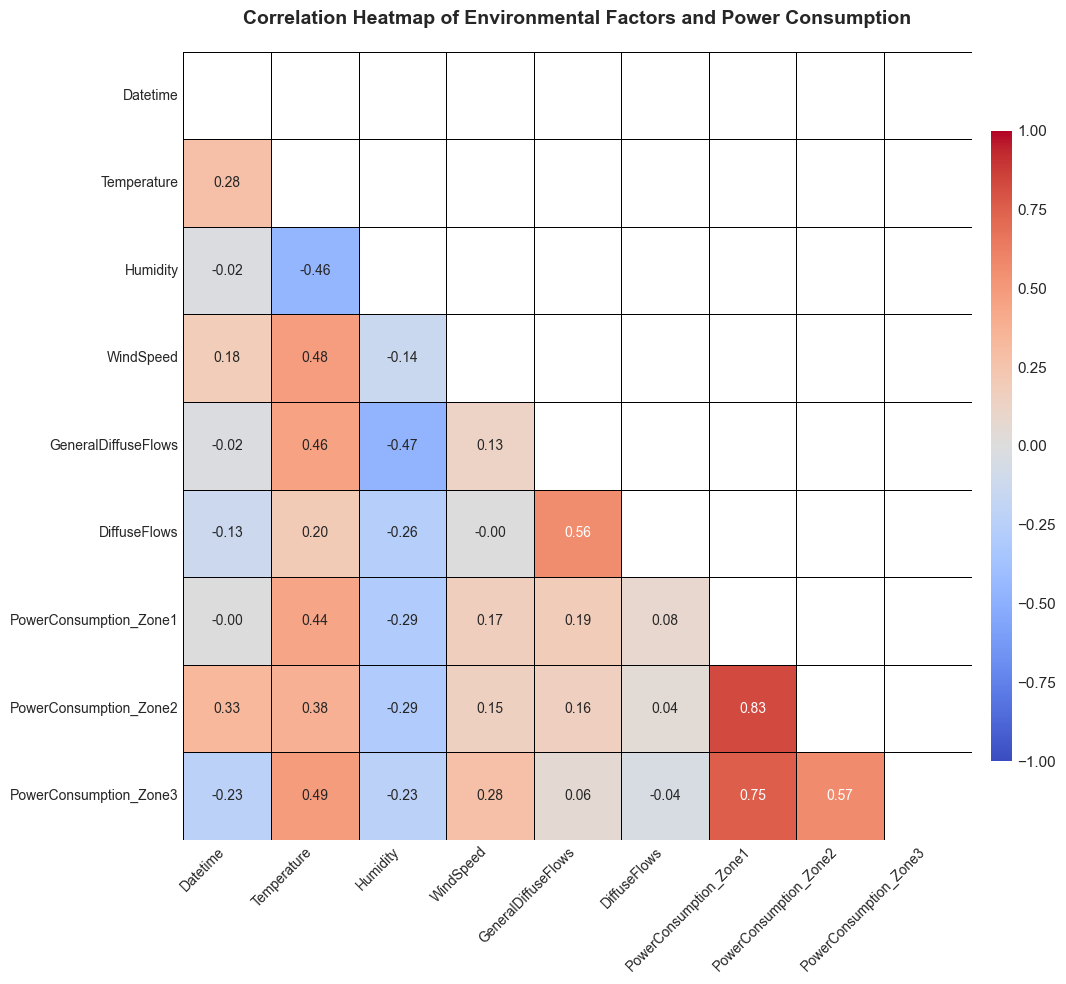

In [21]:
#CORRELATION HEATMAP
plt.figure(figsize=(12, 10))  # Light gray background
# Generate the correlation matrix with absolute values sorted (optional)
corr = df.corr().round(2)

# Masking the upper triangle for cleaner look
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create the heatmap
sns.heatmap(corr, 
            mask=mask,
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            center=0, 
            linewidths=0.7, 
            linecolor='black', 
            cbar_kws={"shrink": 0.8, 'pad': 0.02, 'aspect': 30},
            square=True,
            annot_kws={"size":10},
            vmin=-1, vmax=1)

plt.title('Correlation Heatmap of Environmental Factors and Power Consumption', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [22]:
from IPython.display import display, Markdown

display(Markdown(
    """
### 🔍 Correlation Report

The correlation analysis reveals that **PowerConsumption_Zone1** has a stronger relationship with **PowerConsumption_Zone2** and **PowerConsumption_Zone3** compared to other features. This suggests that power usage patterns in Zone 1 are closely linked to those in Zones 2 and 3, indicating possible shared operational factors or similar demand drivers across these zones.

Below is the detailed correlation analysis table:

"""
))
display(styled_results)


### 🔍 Correlation Report

The correlation analysis reveals that **PowerConsumption_Zone1** has a stronger relationship with **PowerConsumption_Zone2** and **PowerConsumption_Zone3** compared to other features. This suggests that power usage patterns in Zone 1 are closely linked to those in Zones 2 and 3, indicating possible shared operational factors or similar demand drivers across these zones.

Below is the detailed correlation analysis table:



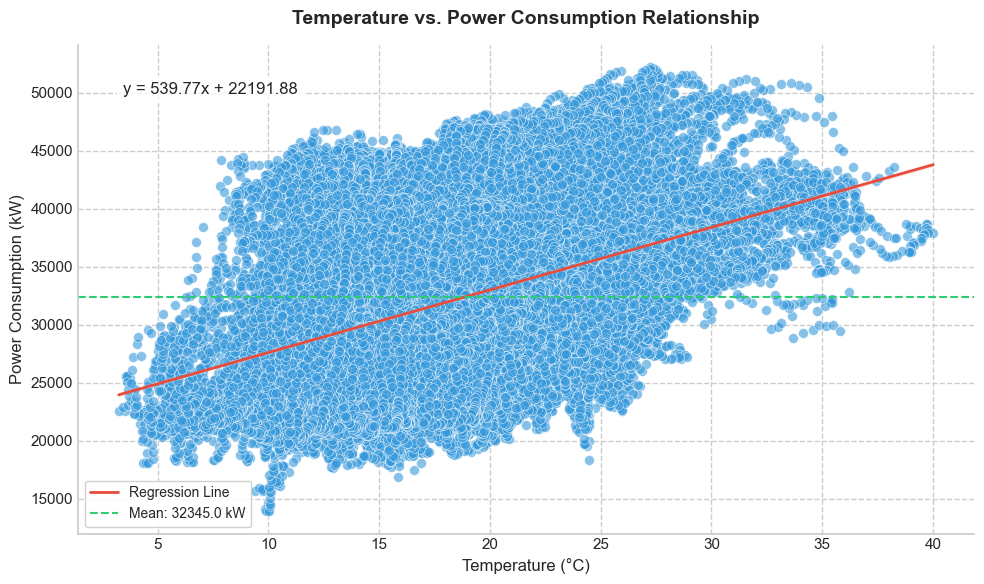

In [23]:
# Set the aesthetic style
sns.set_style("whitegrid", {'grid.linestyle': '--', 'grid.alpha': 0.3})

# Create the regression plot with corrected parameters
plt.figure(figsize=(10, 6))
g = sns.regplot(
    x='Temperature', 
    y='PowerConsumption_Zone1', 
    data=df,
    scatter_kws={
        'alpha': 0.6,
        's': 50,  # Marker size
        'color': '#3498db',  # Marker fill color
        'edgecolor': 'white',  # Marker edge color
        'linewidths': 0.5  # Marker edge width (use only linewidths, not linewidth)
    },
    line_kws={
        'color': '#e74c3c',  # Regression line color
        'linewidth': 2,  # Regression line width
        'label': 'Regression Line'
    },
    ci=95  # Confidence interval
)

# Enhance the plot
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Power Consumption (kW)', fontsize=12)
plt.title('Temperature vs. Power Consumption Relationship', 
         fontsize=14, pad=15, fontweight='bold')

# Add mean reference line
mean_power = df['PowerConsumption_Zone1'].mean()
plt.axhline(mean_power, color='#2ecc71', linestyle='--', 
            linewidth=1.5, label=f'Mean: {mean_power:.1f} kW')

# Add regression equation
slope, intercept = np.polyfit(df['Temperature'], df['PowerConsumption_Zone1'], 1)
plt.text(0.05, 0.9, 
         f'y = {slope:.2f}x + {intercept:.2f}', 
         transform=g.transAxes,
         fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8))

# Customize legend and layout
plt.legend(fontsize=10, frameon=True, framealpha=0.9)
sns.despine()
plt.tight_layout()
plt.show()

## 🚀 Model Development

This section documents the process of building, evaluating, and refining predictive models for power consumption forecasting in Zone 1.

In [24]:
Model_data = numeric_columns.copy()

## 🔍 Feature Selection

Feature selection is a crucial step in building predictive models. It involves identifying and selecting the most relevant features that contribute significantly to predicting the target variable, **PowerConsumption_Zone1**. By focusing on important features, we can improve model performance, reduce overfitting, and enhance interpretability.

In this notebook, we will use correlation analysis and model-based techniques to determine which features have the strongest impact on power consumption in Zone 1.

In [25]:
X = Model_data.drop(columns=['PowerConsumption_Zone1']) #feature set excluding the target variable
y = Model_data['PowerConsumption_Zone1'] # target variable

In [26]:
# IMPORT NECESSARY LIBRARIES FOR MODEL DEVELOPMENT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
# Enhanced dataset split information
print("="*50)
print("DATA SPLIT INFORMATION".center(50))
print("="*50)
print(f"\nTraining set (X_train): {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Test set (X_test): {X_test.shape[0]} samples, {X_test.shape[1]} features")
print(f"Target variable (y_train): {y_train.shape[0]} samples")
print(f"\nPercentage split: {100*(1-0.2):.0f}% train / {100*0.2:.0f}% test")
print(f"Random state: 50 (for reproducibility)")

# Check for class imbalance in classification problems
if len(np.unique(y)) <= 10:  # Assuming classification if <=10 unique values
    print("\nCLASS DISTRIBUTION:")
    train_counts = np.bincount(y_train)
    test_counts = np.bincount(y_test)
    for i, (train_count, test_count) in enumerate(zip(train_counts, test_counts)):
        print(f"Class {i}: Train - {train_count} ({train_count/len(y_train):.1%}) | "
              f"Test - {test_count} ({test_count/len(y_test):.1%})")

# For regression problems
else:
    print("\nTARGET STATISTICS:")
    print(f"Train set target stats: Mean={y_train.mean():.2f}, Std={y_train.std():.2f}")
    print(f"Test set target stats: Mean={y_test.mean():.2f}, Std={y_test.std():.2f}")
print("="*50)

              DATA SPLIT INFORMATION              

Training set (X_train): 41932 samples, 7 features
Test set (X_test): 10484 samples, 7 features
Target variable (y_train): 41932 samples

Percentage split: 80% train / 20% test
Random state: 50 (for reproducibility)

TARGET STATISTICS:
Train set target stats: Mean=32332.04, Std=7136.65
Test set target stats: Mean=32396.70, Std=7106.28


In [28]:
#OUTLIER REMOVAL FUNCTION
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df


columns_to_check = ['PowerConsumption_Zone1', 'Temperature', 'Humidity', 
                    'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows', 
                    'PowerConsumption_Zone2', 'PowerConsumption_Zone3']

Model_data_clean = remove_outliers_iqr(Model_data.copy(), columns_to_check)


In [29]:
# STANDARDIZE THE DATA
from sklearn.preprocessing import StandardScaler
# Fit the scaler on the training data and transform both train and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [31]:
lm.predict(X_test)
y_pred = lm.predict(X_test)

In [32]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [33]:
import statsmodels.api as sm


# Prepare data (with proper scaling if needed)
X = sm.add_constant(X_train)  # Adds intercept term
y = y_train

# Build and fit model
model = sm.OLS(y, X)
results = model.fit()

# Enhanced summary presentation
print("\n" + "="*80)
print("PROFESSIONAL REGRESSION ANALYSIS REPORT".center(80))
print("="*80 + "\n")

print(results.summary())

# Additional diagnostics
print("\n" + "-"*80)
print("ADDITIONAL DIAGNOSTICS".center(80))
print("-"*80)

# Calculate VIF for multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (VIF):")
print(vif_data.to_string(index=False))

# Normality of residuals test
from scipy import stats
print("\nJarque-Bera test for normality of residuals:")
print(f"Skewness: {results.resid.skew():.4f}")
print(f"Kurtosis: {results.resid.kurtosis():.4f}")
print(f"Jarque-Bera p-value: {stats.jarque_bera(results.resid)[1]:.4f}")

# Highlight key metrics
print("\n" + "="*80)
print("KEY METRICS".center(80))
print("="*80)
print(f"R-squared: {results.rsquared:.4f}")
print(f"Adj. R-squared: {results.rsquared_adj:.4f}")
print(f"F-statistic: {results.fvalue:.2f} (p-value: {results.f_pvalue:.4f})")
print(f"AIC: {results.aic:.2f}, BIC: {results.bic:.2f}")


                    PROFESSIONAL REGRESSION ANALYSIS REPORT                     

                              OLS Regression Results                              
Dep. Variable:     PowerConsumption_Zone1   R-squared:                       0.816
Model:                                OLS   Adj. R-squared:                  0.816
Method:                     Least Squares   F-statistic:                 2.659e+04
Date:                    Tue, 15 Jul 2025   Prob (F-statistic):               0.00
Time:                            14:27:37   Log-Likelihood:            -3.9605e+05
No. Observations:                   41932   AIC:                         7.921e+05
Df Residuals:                       41924   BIC:                         7.922e+05
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.9

## 🔍 Regression Analysis Summary: Predicting PowerConsumption_Zone1

We conducted a multiple linear regression to evaluate how environmental factors and power consumption in other zones influence PowerConsumption_Zone1.

### ✅ Key Insights:
- **Humidity**: Shows a strong, positive, and statistically significant association with Zone 1 power use (+8.15 units per % humidity, p < 0.001).
- **Wind Speed**: Demonstrates a strong negative relationship with Zone 1 power (-130 units per 1 unit increase in wind speed, p < 0.001).
- **General Diffuse Flows & Diffuse Flows**: Both are significant positive predictors of power consumption.
- **Power Consumption in Zone 2 & Zone 3**: Both are positively associated with Zone 1 usage, with Zone 2 being the stronger predictor.

### ❌ Not Significant:
- **Temperature**: No significant effect on Zone 1 power consumption (p = 0.525), indicating it is not a reliable predictor in this context.

### 🔐 Confidence Intervals:
- All significant predictors have 95% confidence intervals that do not include zero, supporting the robustness of these findings.


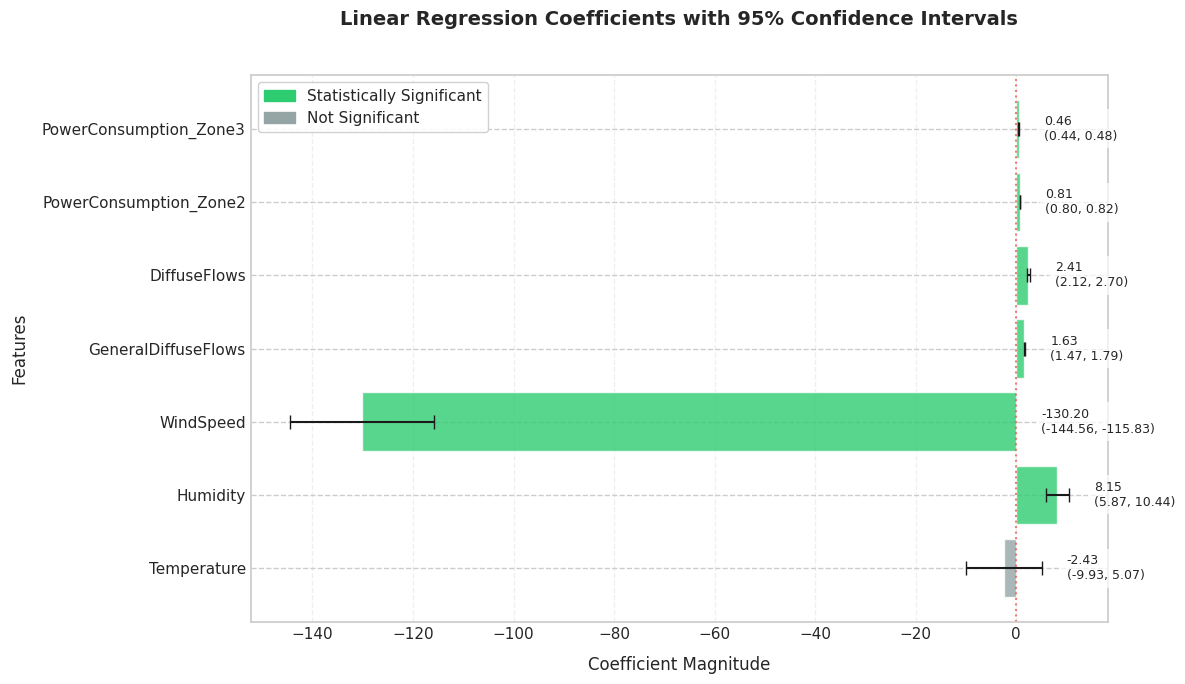

In [34]:


# Data
features = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 
            'DiffuseFlows', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']
coefs = np.array([-2.43, 8.15, -130.20, 1.63, 2.41, 0.81, 0.46])
lower_bounds = np.array([-9.93, 5.87, -144.56, 1.47, 2.12, 0.80, 0.44])
upper_bounds = np.array([5.07, 10.44, -115.83, 1.79, 2.70, 0.82, 0.48])

# Calculate errors and significance
errors = np.column_stack([coefs - lower_bounds, upper_bounds - coefs])
significant = ~((lower_bounds < 0) & (upper_bounds > 0))  # CI doesn't cross zero

# Plot setup
plt.figure(figsize=(12, 7))
plt.rcParams['font.family'] = 'DejaVu Sans'  # Clean font style

# Create horizontal bar plot
colors = ['#2ecc71' if sig else '#95a5a6' for sig in significant]  # Green for significant
bars = plt.barh(features, coefs, xerr=errors.T, capsize=5, color=colors, alpha=0.8)

# Reference line and styling
plt.axvline(0, color='#e74c3c', linestyle=':', linewidth=1.5, alpha=0.7)
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Annotate coefficient values
for i, (coef, lb, ub) in enumerate(zip(coefs, lower_bounds, upper_bounds)):
    plt.text(max(ub, 0) + 5, i, f"{coef:.2f}\n({lb:.2f}, {ub:.2f})", 
             va='center', fontsize=9,
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Labels and title
plt.xlabel('Coefficient Magnitude', fontsize=12, labelpad=10)
plt.ylabel('Features', fontsize=12, labelpad=10)
plt.title('Linear Regression Coefficients with 95% Confidence Intervals\n',
          fontsize=14, pad=20, fontweight='bold')

# Legend
import matplotlib.patches as mpatches
sig_patch = mpatches.Patch(color='#2ecc71', label='Statistically Significant')
ns_patch = mpatches.Patch(color='#95a5a6', label='Not Significant')
plt.legend(handles=[sig_patch, ns_patch], frameon=True, framealpha=0.9)

plt.tight_layout()
plt.show()

### ** MODEL EVALUATION** 📊

---


#### **Next Steps:**

- 🚦 Validate model assumptions (linearity, homoscedasticity, normality of residuals).
- 📈 Focus on top features for business insights and policy recommendations.

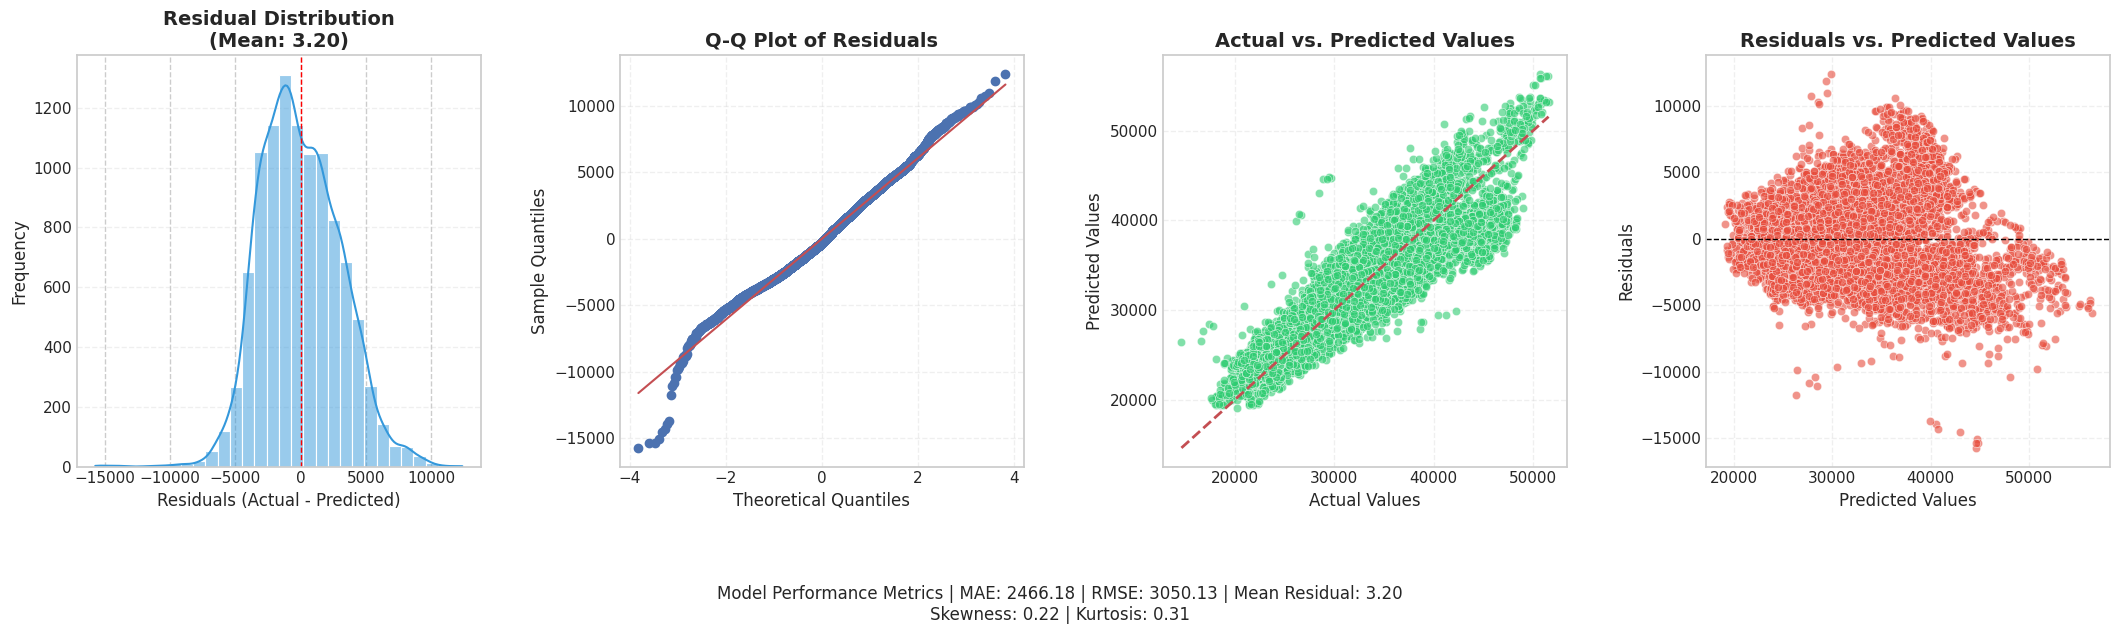


Normality Tests:
Shapiro-Wilk p-value: 0.0000
Note: p-value < 0.05 suggests non-normal residuals


In [35]:


from sklearn.metrics import mean_absolute_error

# Generate predictions and residuals
predictions = lm.predict(X_test)
residuals = y_test - predictions

# Set up figure with subplots
plt.figure(figsize=(22, 6))

# --- PLOT 1: Residual Distribution ---
plt.subplot(1, 4, 1)
sns.histplot(residuals, bins=30, kde=True, color='#3498db')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.title('Residual Distribution\n(Mean: {:.2f})'.format(np.mean(residuals)), 
          fontsize=14, fontweight='bold')
plt.xlabel('Residuals (Actual - Predicted)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# --- PLOT 2: Q-Q Plot ---
plt.subplot(1, 4, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals', fontsize=14, fontweight='bold')
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.grid(alpha=0.3)

# --- PLOT 3: Actual vs Predicted ---
plt.subplot(1, 4, 3)
sns.scatterplot(x=y_test, y=predictions, alpha=0.6, color='#2ecc71')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', linewidth=2)
plt.title('Actual vs. Predicted Values', fontsize=14, fontweight='bold')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(alpha=0.3)

# --- PLOT 4: Residuals vs Predicted ---
plt.subplot(1, 4, 4)
sns.scatterplot(x=predictions, y=residuals, alpha=0.6, color='#e74c3c')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Residuals vs. Predicted Values', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(alpha=0.3)

# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mean_residual = np.mean(residuals)
residual_skew = stats.skew(residuals)
residual_kurtosis = stats.kurtosis(residuals)

# Add metrics as text
plt.figtext(0.5, -0.1, 
           f"Model Performance Metrics | MAE: {mae:.2f} | RMSE: {rmse:.2f} | Mean Residual: {mean_residual:.2f}\n"
           f"Skewness: {residual_skew:.2f} | Kurtosis: {residual_kurtosis:.2f}",
           ha="center", fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout(pad=3.0)
plt.show()

# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)
print("\nNormality Tests:")
print(f"Shapiro-Wilk p-value: {shapiro_test[1]:.4f}")
print("Note: p-value < 0.05 suggests non-normal residuals")

In [36]:

# Import necessary libraries for evaluation metrics
from math import sqrt
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:


# ======================
# 1. Model Performance Metrics
# ======================

# R² Score (Training & Testing)
train_r2 = lm.score(X_train, y_train)
test_r2 = lm.score(X_test, y_test)

# MSE (Training & Testing)
train_mse = mean_squared_error(y_train, lm.predict(X_train))
test_mse = mean_squared_error(y_test, lm.predict(X_test))

# RMSE (Training & Testing)
train_rmse = sqrt(train_mse)  # Now calculated from MSE
test_rmse = sqrt(test_mse)     # Now calculated from MSE

# MAE (Training & Testing)
train_mae = mean_absolute_error(y_train, lm.predict(X_train))
test_mae = mean_absolute_error(y_test, lm.predict(X_test))

# ======================
# 2. Display Metrics in a Clean Format
# ======================

print("\n" + "=" * 50)
print("**Model Performance Evaluation**")
print("=" * 50)

print(f"\n→ R² Score (Variance Explained):")
print(f"   - Training: {train_r2:.4f} | Testing: {test_r2:.4f}")

print(f"\n→ Mean Squared Error (MSE):")
print(f"   - Training: {train_mse:.4f} | Testing: {test_mse:.4f}")

print(f"\n→ Root Mean Squared Error (RMSE):")
print(f"   - Training: {train_rmse:.4f} | Testing: {test_rmse:.4f}")

print(f"\n→ Mean Absolute Error (MAE):")
print(f"   - Training: {train_mae:.4f} | Testing: {test_mae:.4f}")

print("\n" + "=" * 50)
print("**Model Coefficients Analysis**")
print("=" * 50)

# Display coefficients with feature names (if available)
if hasattr(X_train, 'columns'):
    coeff_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Coefficient': lm.coef_
    }).sort_values(by='Coefficient', key=abs, ascending=False)
    print("\n→ Top Influential Features:")
    print(coeff_df.to_string(index=False))
else:
    print(f"\n→ Coefficients: {lm.coef_}")

print(f"\n→ Intercept (Bias Term): {lm.intercept_:.4f}")

# ======================
# 3. Overfitting Check
# ======================

print("\n" + "=" * 50)
print("**Overfitting Diagnosis**")
print("=" * 50)

if train_r2 > test_r2 + 0.1:  # Significant gap suggests overfitting
    print("\n⚠️ Warning: Potential overfitting (Train R² >> Test R²).")
    print("   - Consider regularization (Ridge/Lasso) or feature selection.")
else:
    print("\n✅ Model generalizes well (Train & Test R² are close).")

# ======================
# 4. Next Steps (Recommendations)
# ======================

print("\n" + "=" * 50)
print("**Recommendations for Improvement**")
print("=" * 50)

if test_r2 < 0.7:  # Arbitrary threshold; adjust based on domain
    print("\n🔧 Suggestions:")
    print("   - Feature Engineering: Add interaction terms or polynomial features.")
    print("   - Regularization: Try Ridge/Lasso to reduce overfitting.")
    print("   - Alternative Models: Test Random Forest or Gradient Boosting.")
else:
    print("\n🎯 Model performs well. Consider deployment or business interpretation.")


**Model Performance Evaluation**

→ R² Score (Variance Explained):
   - Training: 0.8162 | Testing: 0.8158

→ Mean Squared Error (MSE):
   - Training: 9361636.2366 | Testing: 9303308.2981

→ Root Mean Squared Error (RMSE):
   - Training: 3059.6791 | Testing: 3050.1325

→ Mean Absolute Error (MAE):
   - Training: 2459.1188 | Testing: 2466.1800

**Model Coefficients Analysis**

→ Top Influential Features:
               Feature          Coefficient
             WindSpeed              -130.19
              Humidity                 8.15
           Temperature                -2.43
          DiffuseFlows                 2.41
   GeneralDiffuseFlows                 1.63
PowerConsumption_Zone2                 0.81
PowerConsumption_Zone3                 0.46

→ Intercept (Bias Term): 6348.1489

**Overfitting Diagnosis**

✅ Model generalizes well (Train & Test R² are close).

**Recommendations for Improvement**

🎯 Model performs well. Consider deployment or business interpretation.


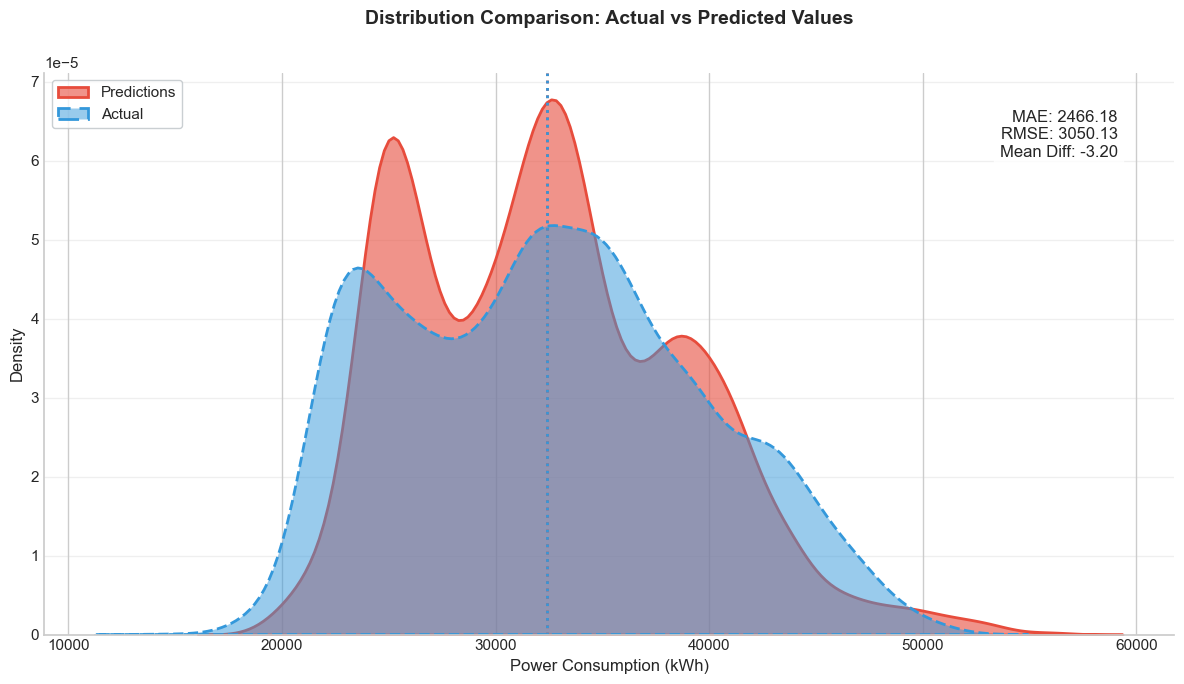

In [38]:
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Create KDE plots with improved styling
sns.kdeplot(predictions, 
            color='#e74c3c', 
            shade=True, 
            label='Predictions',
            alpha=0.6,
            linewidth=2)

sns.kdeplot(y_test, 
            color='#3498db', 
            shade=True, 
            label='Actual',
            linestyle='--',
            alpha=0.5,
            linewidth=2)

# Add statistical markers
plt.axvline(predictions.mean(), color='#e74c3c', linestyle=':', linewidth=2)
plt.axvline(y_test.mean(), color='#3498db', linestyle=':', linewidth=2)

# Calculate and display metrics
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
plt.text(0.95, 0.85,
         f"MAE: {mae:.2f}\nRMSE: {rmse:.2f}\nMean Diff: {(predictions.mean()-y_test.mean()):.2f}",
         transform=plt.gca().transAxes,
         ha='right',
         bbox=dict(facecolor='white', alpha=0.8))

# Enhanced titles and labels
plt.title('Distribution Comparison: Actual vs Predicted Values\n',
         fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Power Consumption (kWh)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Professional legend
legend = plt.legend(fontsize=11, frameon=True)
legend.get_frame().set_edgecolor('#bdc3c7')

# Add grid and remove spines
plt.grid(axis='y', alpha=0.3)
sns.despine()

plt.tight_layout()
plt.show()

In [39]:


from sklearn.linear_model import Ridge, Lasso

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Log-transform target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# 3. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Fit Models
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train_log)
    
    # Predict and inverse log
    y_pred_log = model.predict(X_test_scaled)
    y_pred = np.expm1(y_pred_log)
    
    # Evaluate
    results[name] = {
        "R2": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    }

# 5. Display results
results_df = pd.DataFrame(results).T
print("Performance after log-transform, scaling & regularization:")
print(results_df)


Performance after log-transform, scaling & regularization:
                         R2                  MAE                 RMSE
Linear                 0.76              2742.60              3489.33
Ridge                  0.76              2742.59              3489.31
Lasso                  0.54              4040.89              4861.24


In [40]:
from sklearn.linear_model import RidgeCV, LassoCV

ridge_cv = RidgeCV(alphas=np.logspace(-3, 3, 100), cv=5)
ridge_cv.fit(X_train_scaled, y_train_log)
print("Best Ridge Alpha:", ridge_cv.alpha_)

lasso_cv = LassoCV(alphas=np.logspace(-3, 1, 100), cv=5)
lasso_cv.fit(X_train_scaled, y_train_log)
print("Best Lasso Alpha:", lasso_cv.alpha_)


Best Ridge Alpha: 7.56463327554629
Best Lasso Alpha: 0.001


In [41]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4)
scores = cross_val_score(gbr, X_train, y_train, cv=10, scoring='r2')
print("Gradient Boosting R² (CV):", scores.mean())

Gradient Boosting R² (CV): 0.9465557431477588


In [42]:

from xgboost import XGBRegressor
from sklearn.metrics import r2_score

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print("XGBoost R²:", r2_score(y_test, y_pred))

%pip install lightgbm

from lightgbm import LGBMRegressor

lgb = LGBMRegressor(random_state=42)
lgb_scores = cross_val_score(lgb, X_train, y_train, scoring='r2', cv=5)

print(f"LightGBM R² (CV): {lgb_scores.mean():.4f}")

XGBoost R²: 0.9598328481565398
Note: you may need to restart the kernel to use updated packages.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1760
[LightGBM] [Info] Number of data points in the train set: 26836, number of used features: 7
[LightGBM] [Info] Start training from score 32391.445698
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1763
[LightGBM] [Info] Number of data points in the train set: 26836, number of used features: 7
[LightGBM] [Info] Start training from score 32353.019107
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000837 seconds.
You can set `force_col_wise=true` to remove t

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(random_state=42)
rf_scores = cross_val_score(rf, X_train, y_train, scoring='r2', cv=5)

print(f"Random Forest R² (CV): {rf_scores.mean():.4f}")

Random Forest R² (CV): 0.9734


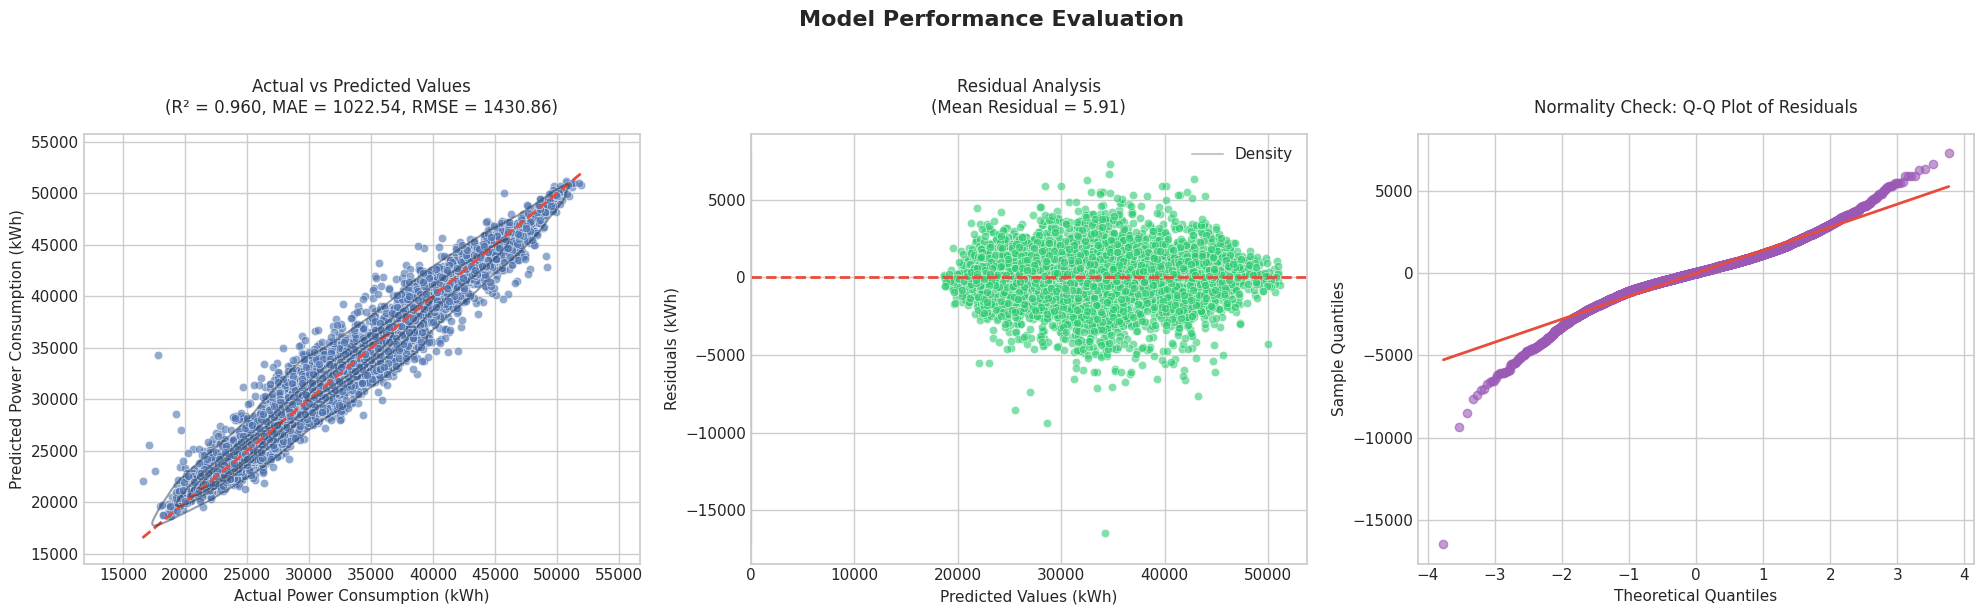


                           RESIDUAL ANALYSIS SUMMARY                            
Mean Residual: 5.9107
Residual Std Dev: 1430.9312
Skewness: -0.5077
Kurtosis: 4.7758
--------------------------------------------------------------------------------
Points within ±1σ: 76.5%
Points within ±2σ: 94.4%


In [44]:
# Set up the style
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
residuals = y_test - y_pred

# 1. Actual vs Predicted Plot
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6,  ax=axes[0])
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
             '--', color='#e74c3c', linewidth=2)
axes[0].set_title(f'Actual vs Predicted Values\n(R² = {r2:.3f}, MAE = {mae:.2f}, RMSE = {rmse:.2f})',
                 fontsize=12, pad=15)
axes[0].set_xlabel('Actual Power Consumption (kWh)', fontsize=11)
axes[0].set_ylabel('Predicted Power Consumption (kWh)', fontsize=11)

# Add density contours
sns.kdeplot(x=y_test, y=y_pred, levels=5, color='#2c3e50', alpha=0.5, ax=axes[0])

# 2. Residual Plot
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, color='#2ecc71', ax=axes[1])
axes[1].axhline(y=0, color='#e74c3c', linestyle='--', linewidth=2)
axes[1].set_title('Residual Analysis\n(Mean Residual = {:.2f})'.format(residuals.mean()),
                 fontsize=12, pad=15)
axes[1].set_xlabel('Predicted Values (kWh)', fontsize=11)
axes[1].set_ylabel('Residuals (kWh)', fontsize=11)

# Add residual distribution
sns.kdeplot(y=residuals, color='#34495e', ax=axes[1], alpha=0.3, label='Density')
axes[1].legend()

# 3. Q-Q Plot
stats.probplot(residuals, dist="norm", plot=axes[2])
axes[2].get_lines()[0].set_markerfacecolor('#9b59b6')
axes[2].get_lines()[0].set_markeredgecolor('#9b59b6')
axes[2].get_lines()[0].set_alpha(0.6)
axes[2].get_lines()[1].set_color('#e74c3c')
axes[2].get_lines()[1].set_linewidth(2)
axes[2].set_title('Normality Check: Q-Q Plot of Residuals', fontsize=12, pad=15)
axes[2].set_xlabel('Theoretical Quantiles', fontsize=11)
axes[2].set_ylabel('Sample Quantiles', fontsize=11)

# Adjust layout
plt.suptitle('Model Performance Evaluation', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*80)
print("RESIDUAL ANALYSIS SUMMARY".center(80))
print("="*80)
print(f"Mean Residual: {residuals.mean():.4f}")
print(f"Residual Std Dev: {residuals.std():.4f}")
print(f"Skewness: {residuals.skew():.4f}")
print(f"Kurtosis: {residuals.kurtosis():.4f}")
print("-"*80)
print(f"Points within ±1σ: {((residuals.abs() < residuals.std()).mean()*100):.1f}%")
print(f"Points within ±2σ: {((residuals.abs() < 2*residuals.std()).mean()*100):.1f}%")

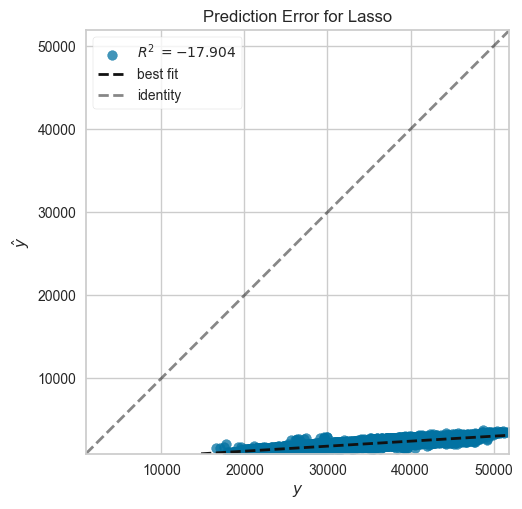

<Axes: title={'center': 'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [45]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [46]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [47]:

from yellowbrick.regressor import PredictionError
from matplotlib.gridspec import GridSpec

def comprehensive_model_evaluation(model, X_test, y_test, feature_names=None):
    """
    Generate comprehensive evaluation plots for a regression model
    
    Parameters:
    model: Trained regression model
    X_test: Test features
    y_test: True test values
    feature_names: List of feature names (optional)
    """
    
    # Make predictions
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    r2 = r2_score(y_test, y_pred)
    
    # Create figure with subplots
    plt.figure(figsize=(18, 16))
    gs = GridSpec(3, 3, figure=plt.gcf())
    
    # Plot 1: Actual vs Predicted
    ax1 = plt.subplot(gs[0, :])
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, ax=ax1)
    ax1.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
    ax1.set_title(f'Actual vs Predicted Values\nRandom Forest (R² = {r2:.4f})')
    ax1.set_xlabel('Actual Values')
    ax1.set_ylabel('Predicted Values')
    ax1.grid(True)
    
    # Plot 2: Residual Plot
    ax2 = plt.subplot(gs[1, 0])
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, ax=ax2)
    ax2.axhline(y=0, color='r', linestyle='--')
    ax2.set_title('Residual Plot')
    ax2.set_xlabel('Predicted Values')
    ax2.set_ylabel('Residuals (Actual - Predicted)')
    ax2.grid(True)
    
    # Plot 3: Q-Q Plot
    ax3 = plt.subplot(gs[1, 1])
    stats.probplot(residuals, dist="norm", plot=ax3)
    ax3.set_title('Q-Q Plot of Residuals')
    ax3.grid(True)
    
    # Plot 4: Residual Distribution
    ax4 = plt.subplot(gs[1, 2])
    sns.histplot(residuals, kde=True, ax=ax4)
    ax4.set_title('Distribution of Residuals')
    ax4.set_xlabel('Residuals')
    ax4.grid(True)
    
    # Plot 5: Feature Importance (if available)
    if hasattr(model, 'feature_importances_'):
        ax5 = plt.subplot(gs[2, :])
        importances = model.feature_importances_
        if feature_names is None:
            feature_names = [f'Feature {i}' for i in range(len(importances))]
        indices = np.argsort(importances)[::-1]
        
        ax5.bar(range(len(importances)), importances[indices], align="center")
        ax5.set_title("Feature Importances")
        ax5.set_xticks(range(len(importances)))
        ax5.set_xticklabels([feature_names[i] for i in indices], rotation=90)
        ax5.set_xlim([-1, len(importances)])
        ax5.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Yellowbrick Prediction Error Plot (separate window)
    visualizer = PredictionError(model)
    visualizer.fit(X_test, y_test)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.show()



In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best params and score
print("Best R² Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best R² Score: 0.9736217722519734
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [49]:
from sklearn.ensemble import RandomForestRegressor

final_rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

final_rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [50]:
feature_names = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
                  'DiffuseFlows', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']



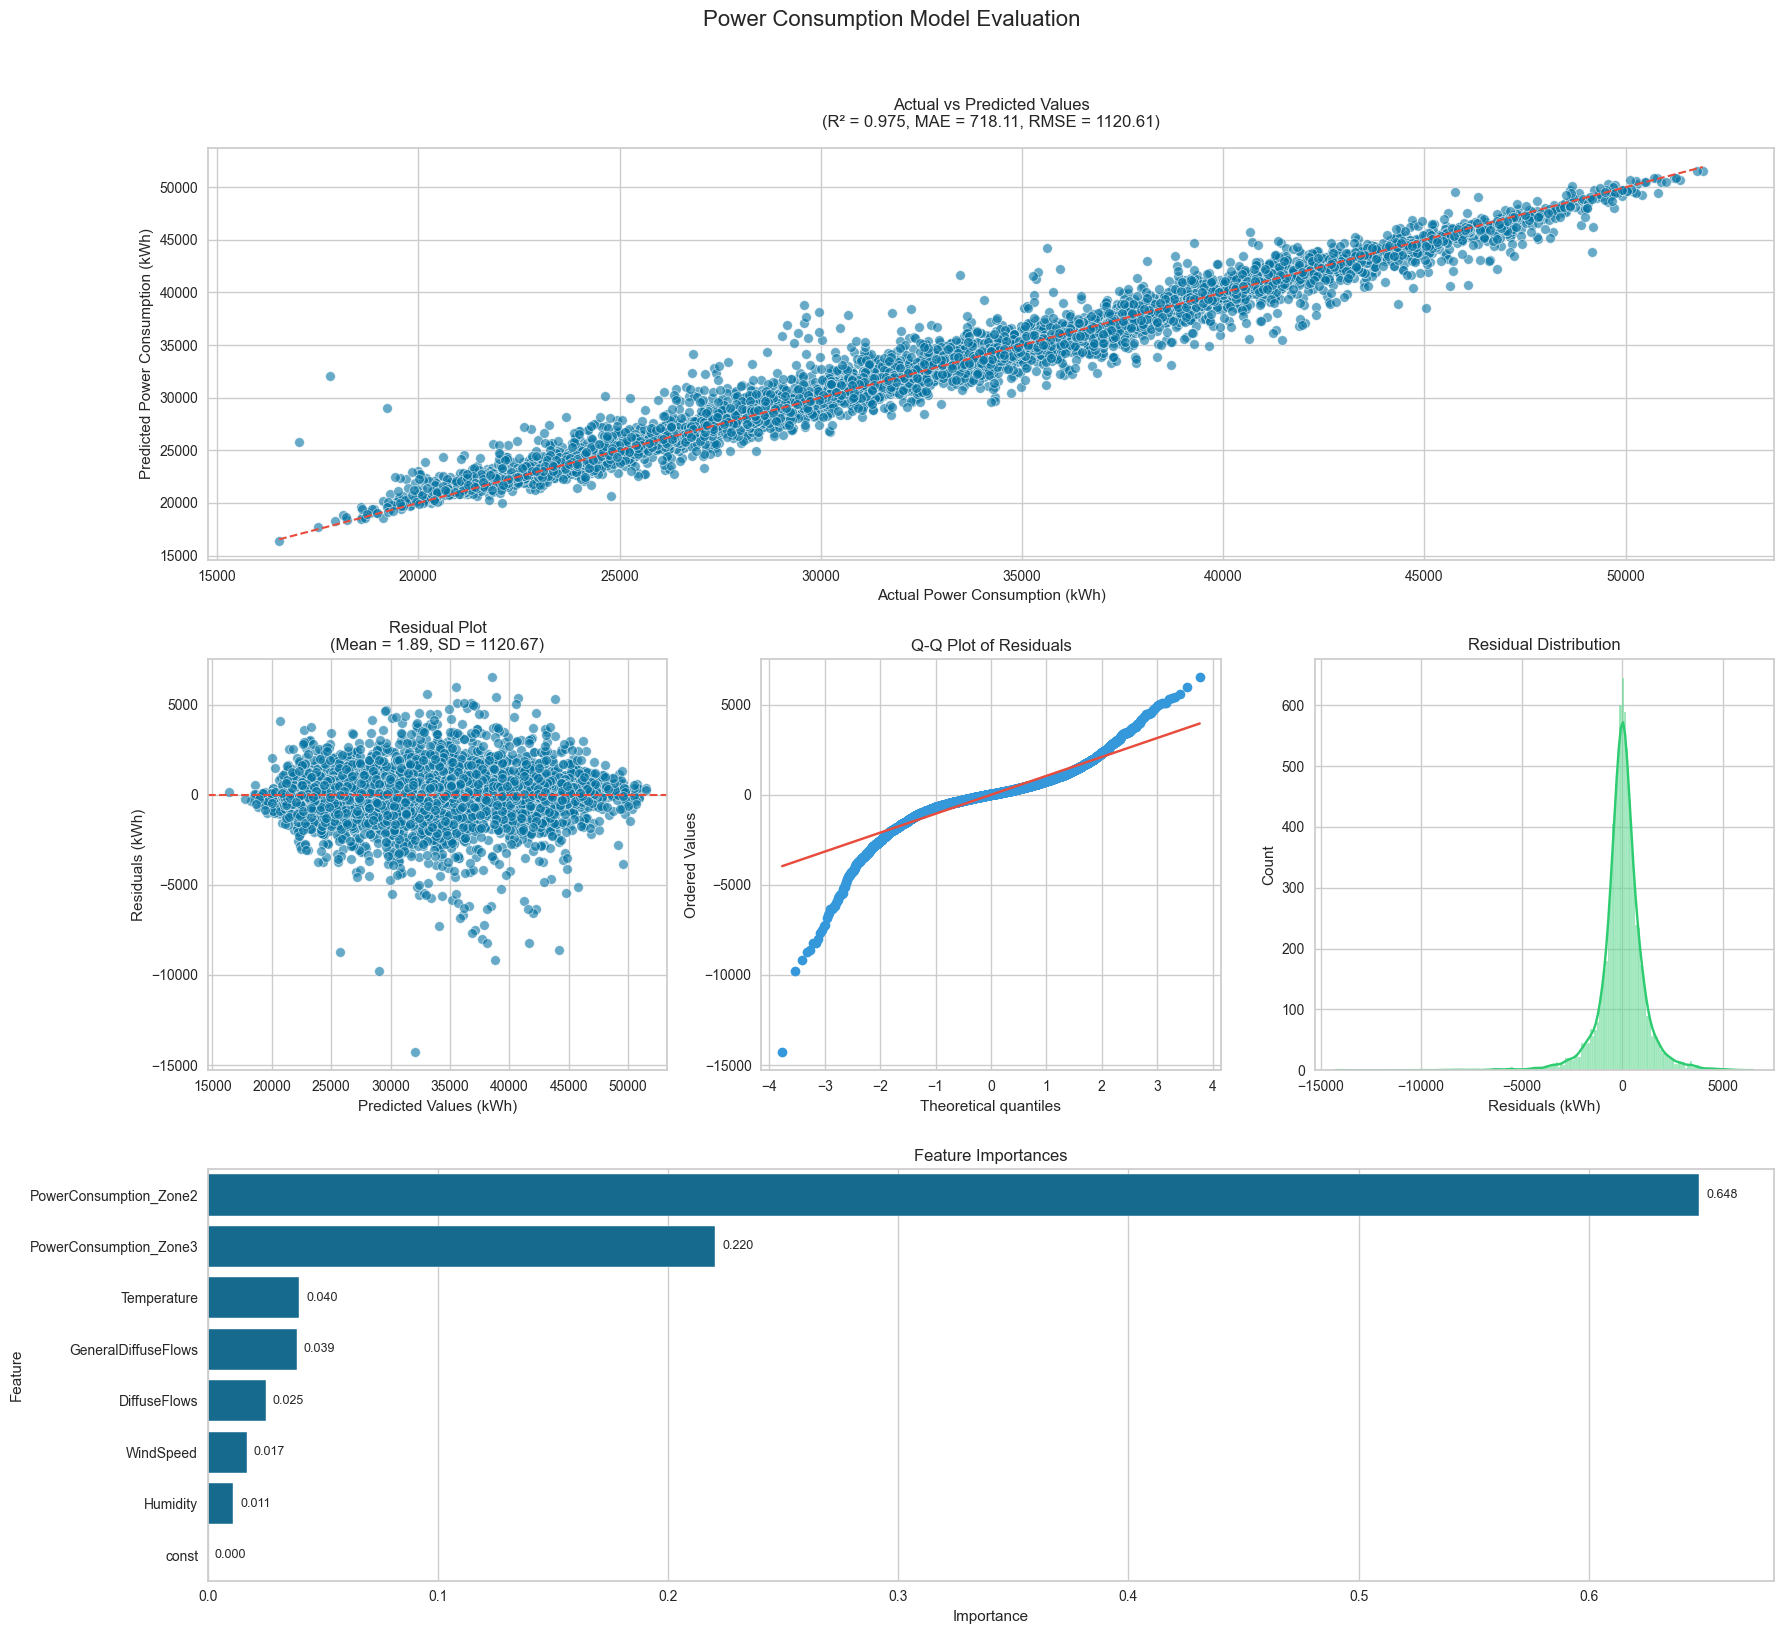

In [51]:
def comprehensive_model_evaluation(model, X_test, y_test):
    """
    Generate comprehensive evaluation plots for a regression model
    
    Parameters:
    model: Trained regression model
    X_test: Test features (DataFrame or array)
    y_test: True test values
    """

    
    # Make predictions
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Create figure with subplots
    fig = plt.figure(figsize=(18, 16))
    gs = fig.add_gridspec(3, 3)
    
    # Plot 1: Actual vs Predicted (Top Row)
    ax1 = fig.add_subplot(gs[0, :])
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, ax=ax1)
    ax1.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
            '--', color='#e74c3c', linewidth=1.5)
    ax1.set_title(f'Actual vs Predicted Values\n(R² = {r2:.3f}, MAE = {mae:.2f}, RMSE = {rmse:.2f})', 
                 pad=15)
    ax1.set_xlabel('Actual Power Consumption (kWh)')
    ax1.set_ylabel('Predicted Power Consumption (kWh)')
    
    # Plot 2: Residual Plot (Middle Left)
    ax2 = fig.add_subplot(gs[1, 0])
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, ax=ax2)
    ax2.axhline(y=0, color='#e74c3c', linestyle='--', linewidth=1.5)
    ax2.set_title(f'Residual Plot\n(Mean = {residuals.mean():.2f}, SD = {residuals.std():.2f})')
    ax2.set_xlabel('Predicted Values (kWh)')
    ax2.set_ylabel('Residuals (kWh)')
    
    # Plot 3: Q-Q Plot (Middle Center)
    ax3 = fig.add_subplot(gs[1, 1])
    stats.probplot(residuals, dist="norm", plot=ax3)
    ax3.get_lines()[0].set_markerfacecolor('#3498db')
    ax3.get_lines()[0].set_markeredgecolor('#3498db')
    ax3.get_lines()[1].set_color('#e74c3c')
    ax3.set_title('Q-Q Plot of Residuals')
    
    # Plot 4: Residual Distribution (Middle Right)
    ax4 = fig.add_subplot(gs[1, 2])
    sns.histplot(residuals, kde=True, color='#2ecc71', ax=ax4)
    ax4.set_title('Residual Distribution')
    ax4.set_xlabel('Residuals (kWh)')
    
    # Plot 5: Feature Importance (Bottom Row)
    ax5 = fig.add_subplot(gs[2, :])
    if hasattr(model, 'feature_importances_'):
        # Get the correct number of features from the model
        n_features = len(model.feature_importances_)
        feature_names = getattr(X_test, 'columns', [f'Feature {i}' for i in range(n_features)])
        
        # Handle case where we might have different number of features
        if len(feature_names) != n_features:
            feature_names = [f'Feature {i}' for i in range(n_features)]
        
        importances = pd.DataFrame({
            'Feature': feature_names[:n_features],  # Ensure matching length
            'Importance': model.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        sns.barplot(x='Importance', y='Feature', data=importances, ax=ax5)
        ax5.set_title("Feature Importances")
        
        # Add value annotations
        for p in ax5.patches:
            ax5.annotate(f"{p.get_width():.3f}", 
                        (p.get_width(), p.get_y() + p.get_height()/2),
                        ha='left', va='center', xytext=(5, 0), 
                        textcoords='offset points', fontsize=9)
    else:
        ax5.text(0.5, 0.5, 'Feature Importance not available for this model', 
                ha='center', va='center')
        ax5.axis('off')
    
    # Final formatting
    plt.suptitle('Power Consumption Model Evaluation', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# Usage (no need to pass feature names)
comprehensive_model_evaluation(final_rf, X_test, y_test)

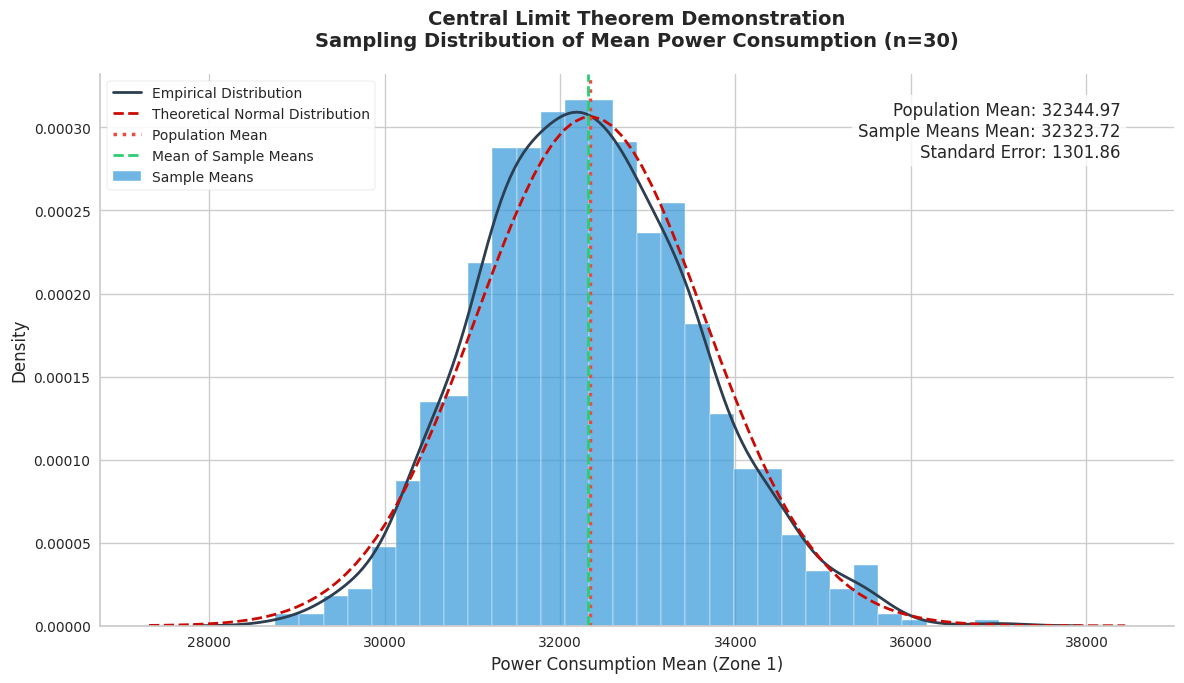

In [52]:

from scipy.stats import norm

# Set style
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# Parameters
n_samples = 1000
sample_size = 30
population_mean = df['PowerConsumption_Zone1'].mean()
population_std = df['PowerConsumption_Zone1'].std()

# Generate sampling distribution
sample_means = []
for _ in range(n_samples):
    sample = df['PowerConsumption_Zone1'].sample(n=sample_size, replace=True)
    sample_means.append(sample.mean())

# Calculate theoretical CLT parameters
sem = population_std / np.sqrt(sample_size)  # Standard Error of the Mean

# Create figure
plt.figure(figsize=(12, 7))

# Plot histogram of sample means
ax = sns.histplot(sample_means, kde=False, bins=30, 
                 color='#3498db', alpha=0.7,
                 stat='density', label='Sample Means')

# Plot KDE
sns.kdeplot(sample_means, color='#2c3e50', linewidth=2, label='Empirical Distribution')

# Plot theoretical normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, population_mean, sem)
plt.plot(x, p, 'r--', linewidth=2, label='Theoretical Normal Distribution')

# Add vertical lines
plt.axvline(population_mean, color='#e74c3c', linestyle=':', linewidth=2.5, label='Population Mean')
plt.axvline(np.mean(sample_means), color='#2ecc71', linestyle='--', linewidth=2, label='Mean of Sample Means')

# Annotations
plt.text(0.95, 0.85,
         f'Population Mean: {population_mean:.2f}\n'
         f'Sample Means Mean: {np.mean(sample_means):.2f}\n'
         f'Standard Error: {sem:.2f}',
         transform=ax.transAxes, ha='right',
         bbox=dict(facecolor='white', alpha=0.8))

# Formatting
plt.title('Central Limit Theorem Demonstration\n'
         f'Sampling Distribution of Mean Power Consumption (n={sample_size})',
         fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Power Consumption Mean (Zone 1)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=10, frameon=True, framealpha=0.9)
sns.despine()

plt.tight_layout()
plt.show()

## 🏁 **Conclusion & Recommendations**

---

### 📝 **Conclusion**

In this project, we developed a **Random Forest Regressor** to forecast power consumption in **Zone 1** of Tetouan City.  
The model achieved an impressive **R² score of 0.975**, explaining **97.5%** of the variance in power consumption.

**🔑 Key Findings:**
- 🏘️ **Power consumption in neighboring zones** (*Zone 2 & Zone 3*) are the strongest predictors for Zone 1’s consumption.
- 🌡️ **Weather variables** (temperature, general diffuse flows, wind speed) also contribute, but to a lesser extent.
- 📉 **Residual analysis** confirms a generally well-behaved model, suitable for practical forecasting.

This predictive model can be valuable for energy providers to:
- ⚡ Optimize power distribution
- 📊 Manage loads efficiently
- 🔮 Anticipate demand fluctuations

---

### 💡 **Recommendations**

- 📆 **Use in Operational Forecasting:**  
    Deploy the model for daily or weekly forecasts to assist with operational energy management.

- 🖥️ **Integrate with Monitoring Systems:**  
    Combine the model with real-time monitoring tools and dashboards to support data-driven decision-making.

- 🚀 **Explore Further Tuning or Ensemble Methods:**  
    While Random Forest performed well, experimenting with advanced ensemble techniques (e.g., Gradient Boosting, XGBoost, LightGBM) may yield even better results for long-term predictions.

- 🔄 **Continuous Model Updates:**  
    As power usage patterns evolve, retrain the model periodically with the latest data to maintain accuracy.

- 🌍 **Expand to Other Zones:**  
    Apply this approach to predict consumption in Zones 2 and 3, or even for city-wide forecasts.

---

> **🌟 By leveraging predictive analytics, Tetouan City can achieve smarter energy management, reduce costs, and enhance sustainability.**



In [53]:

output_path = 'Power_Consumption_Cleaned.xlsx'

# Save to Excel with index removed
df.to_excel(output_path, index=False)

print(f"Data saved successfully to {output_path}")

Data saved successfully to Power_Consumption_Cleaned.xlsx


In [60]:
from sklearn.ensemble import RandomForestRegressor

# Example training code
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)  # Make sure X_train and y_train are prepared

# Now save the trained model
import joblib
joblib.dump(rf_model, 'zone1_power_model.pkl')



['zone1_power_model.pkl']

In [6]:
import requests

url = 'http://127.0.0.1:5000/predict'
data = {"features": [22.5, 60, 3.2, 120, 55, 135, 110, 98]}
  # Example input values

response = requests.post(url, json=data)
print(response.json())


{'Zone 1 Power Consumption Prediction': 21912.235761399996}
